In [26]:

import active_clustering_util
import importlib
from active_clustering_util import *
importlib.reload(active_clustering_util)

<module 'active_clustering_util' from '/home/bk/dev/seminar/active_clustering_util.py'>

In [135]:
import warnings
warnings.filterwarnings("ignore")


In [216]:
# filename = 'filtered_3way_after_80%.xes'
filename = 'PrepaidTravelCost.xes'
log, variants_count = read_xes(filename,1)
GL = add_frequency_into_variants_count(variants_count)
VARIANT = []
for gl in GL: 
    VARIANT.append(gl['variant'])

length of trace 2099 
length of event 18246 
number of variants : 202


In [156]:
w = 1  #window size
tf = 0.99 #target fitness
nb_clus = 4 #number of cluster
N = 1 #case separate 
mcs = 0.25

****************************************************************************************************
START OF No. 0 CLUSTERING

Clustering() is called. mcs:0.25, tf:0.99, w:1
----------------------------------------------------------------------------------------------------
START OF LOOP with cur_dpi

 * C is empty set or |W| = 1. |C|:0, |W|:26 ->  R[0] is to be added.


 * Fitness check to be done with cur_dpi
	 A,B,C,D,Z...

 * CASE of fit 1.0 >= 0.99 tf -> Cur_dpi is added to cluster C & removed from R
	

END OF LOOP with cur_dpi____fit : 1.0 / size of C: 1 / size of R: 25 / size of I: 0


----------------------------------------------------------------------------------------------------
START OF LOOP with cur_dpi

 * C is not empty set, so w in W to be selected with min_dist

 * Selected dpi via dpi_finder() :
	A,C,B,D,Z... with dist 0.0

 * Fitness check to be done with cur_dpi
	 A,C,B,D,Z...

 * CASE of fit 1.0 >= 0.99 tf -> Cur_dpi is added to cluster C & removed from R
	

END

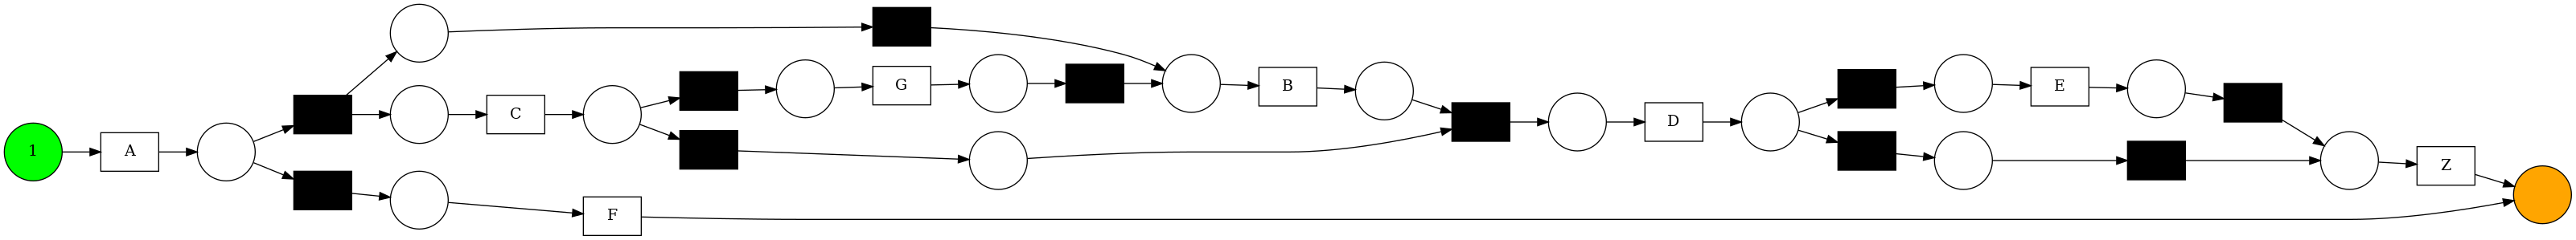

COMPLETION OF SINGLE CLUSTERING
****************************************************************************************************
START OF No. 1 CLUSTERING

Clustering() is called. mcs:0.25, tf:0.99, w:1
----------------------------------------------------------------------------------------------------
START OF LOOP with cur_dpi

 * C is empty set or |W| = 1. |C|:0, |W|:20 ->  R[0] is to be added.


 * Fitness check to be done with cur_dpi
	 A,H,B,C,D,Z...

 * CASE of fit 1.0 >= 0.99 tf -> Cur_dpi is added to cluster C & removed from R
	

END OF LOOP with cur_dpi____fit : 1.0 / size of C: 1 / size of R: 19 / size of I: 0


----------------------------------------------------------------------------------------------------
START OF LOOP with cur_dpi

 * C is not empty set, so w in W to be selected with min_dist

 * Selected dpi via dpi_finder() :
	A,I,B,C,D,Z... with dist 0.0

 * Fitness check to be done with cur_dpi
	 A,I,B,C,D,Z...

 * CASE of fit 1.0 >= 0.99 tf -> Cur_dpi is adde

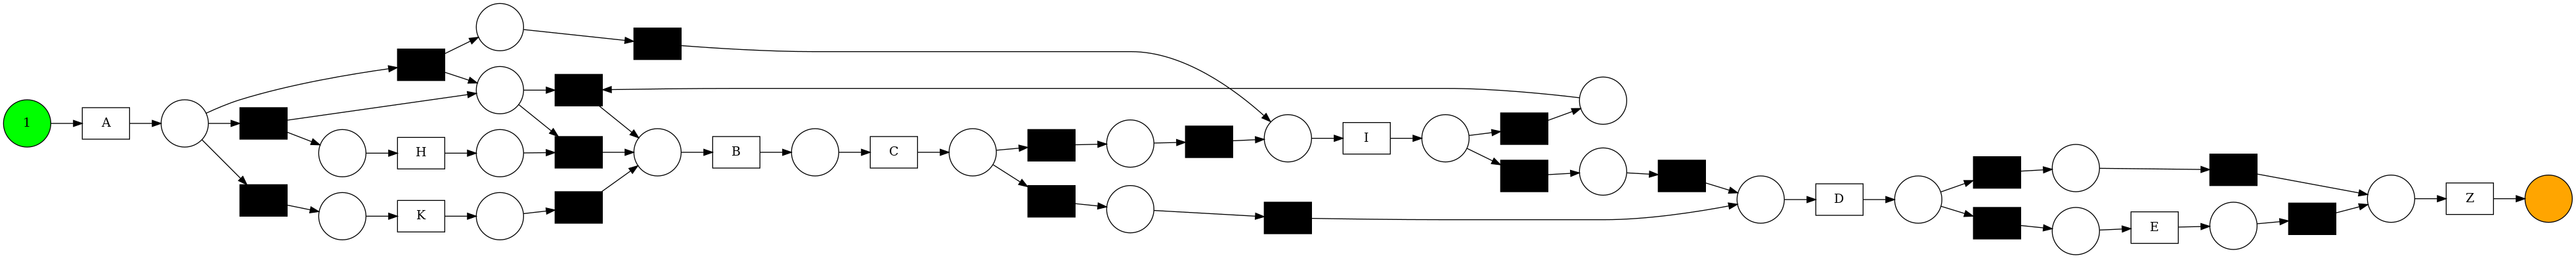

COMPLETION OF SINGLE CLUSTERING
****************************************************************************************************
START OF No. 2 CLUSTERING

Clustering() is called. mcs:0.25, tf:0.99, w:1
----------------------------------------------------------------------------------------------------
START OF LOOP with cur_dpi

 * C is empty set or |W| = 1. |C|:0, |W|:14 ->  R[0] is to be added.


 * Fitness check to be done with cur_dpi
	 A,I,C,B,D,Z...

 * CASE of fit 1.0 >= 0.99 tf -> Cur_dpi is added to cluster C & removed from R
	

END OF LOOP with cur_dpi____fit : 1.0 / size of C: 1 / size of R: 13 / size of I: 0


----------------------------------------------------------------------------------------------------
START OF LOOP with cur_dpi

 * C is not empty set, so w in W to be selected with min_dist

 * Selected dpi via dpi_finder() :
	A,C,G,B,D,E,Z... with dist 0.0

 * Fitness check to be done with cur_dpi
	 A,C,G,B,D,E,Z...

 * CASE of fit 1.0 >= 0.99 tf -> Cur_dpi is 

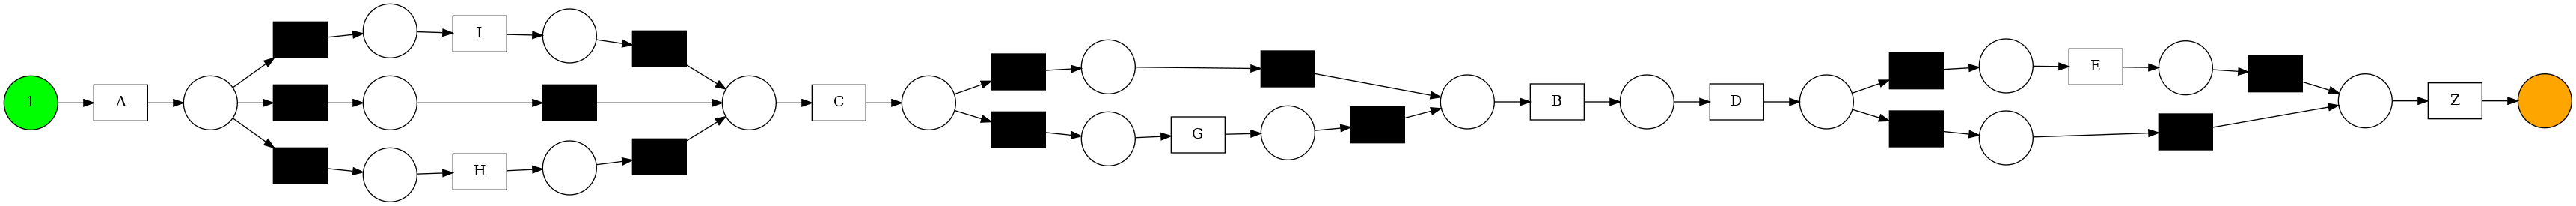

COMPLETION OF SINGLE CLUSTERING
****************************************************************************************************
START OF No. 3 CLUSTERING

Clustering() is called. mcs:0.25, tf:0.99, w:1
----------------------------------------------------------------------------------------------------
START OF LOOP with cur_dpi

 * C is empty set or |W| = 1. |C|:0, |W|:10 ->  R[0] is to be added.


 * Fitness check to be done with cur_dpi
	 J,A,B,C,D,Z...

 * CASE of fit 1.0 >= 0.99 tf -> Cur_dpi is added to cluster C & removed from R
	

END OF LOOP with cur_dpi____fit : 1.0 / size of C: 1 / size of R: 9 / size of I: 0


----------------------------------------------------------------------------------------------------
START OF LOOP with cur_dpi

 * C is not empty set, so w in W to be selected with min_dist

 * Selected dpi via dpi_finder() :
	A,I,H,B,C,D,Z... with dist 0.0

 * Fitness check to be done with cur_dpi
	 A,I,H,B,C,D,Z...

 * CASE of fit 1.0 >= 0.99 tf -> Cur_dpi is a

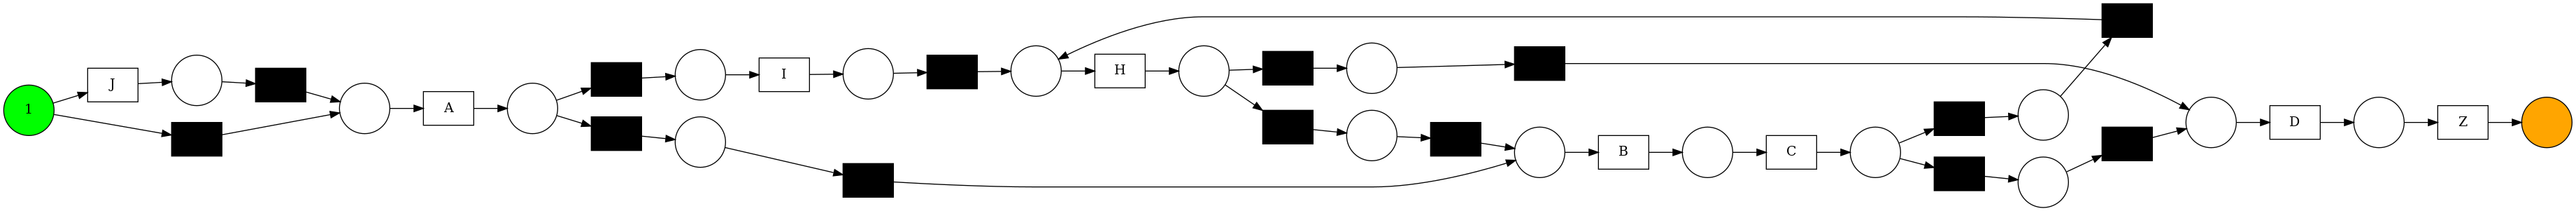

COMPLETION OF SINGLE CLUSTERING
COMPLETION OF WHOLE CLUSTERING


In [157]:
R=VARIANT.copy()
C=[]
I=[]
CS=[]

for i in range(nb_clus) : 
    print("*"*100)
    print("START OF No. {} CLUSTERING".format(i))
    C = []
    I = []
    C, R = clustering(
        C, I, R, 
        log, mcs, tf, w, 
        visual=False, 
        output=False
    )
    CS.append(C)

    print("COMPLETION OF SINGLE CLUSTERING")
print("COMPLETION OF WHOLE CLUSTERING")


In [158]:
R

['A,C,C,C,C,G,G,G,G,B,D,Z',
 'A,B,C,I,D,E,Z',
 'A,C,C,C,G,G,G,B,D,Z',
 'A,C,C,C,C,C,G,G,G,G,G,B,D,Z',
 'A,B,I,C,D,Z',
 'A,C,C,C,C,C,C,G,G,G,G,G,G,B,D,Z',
 'A,B,C,C,D,Z']

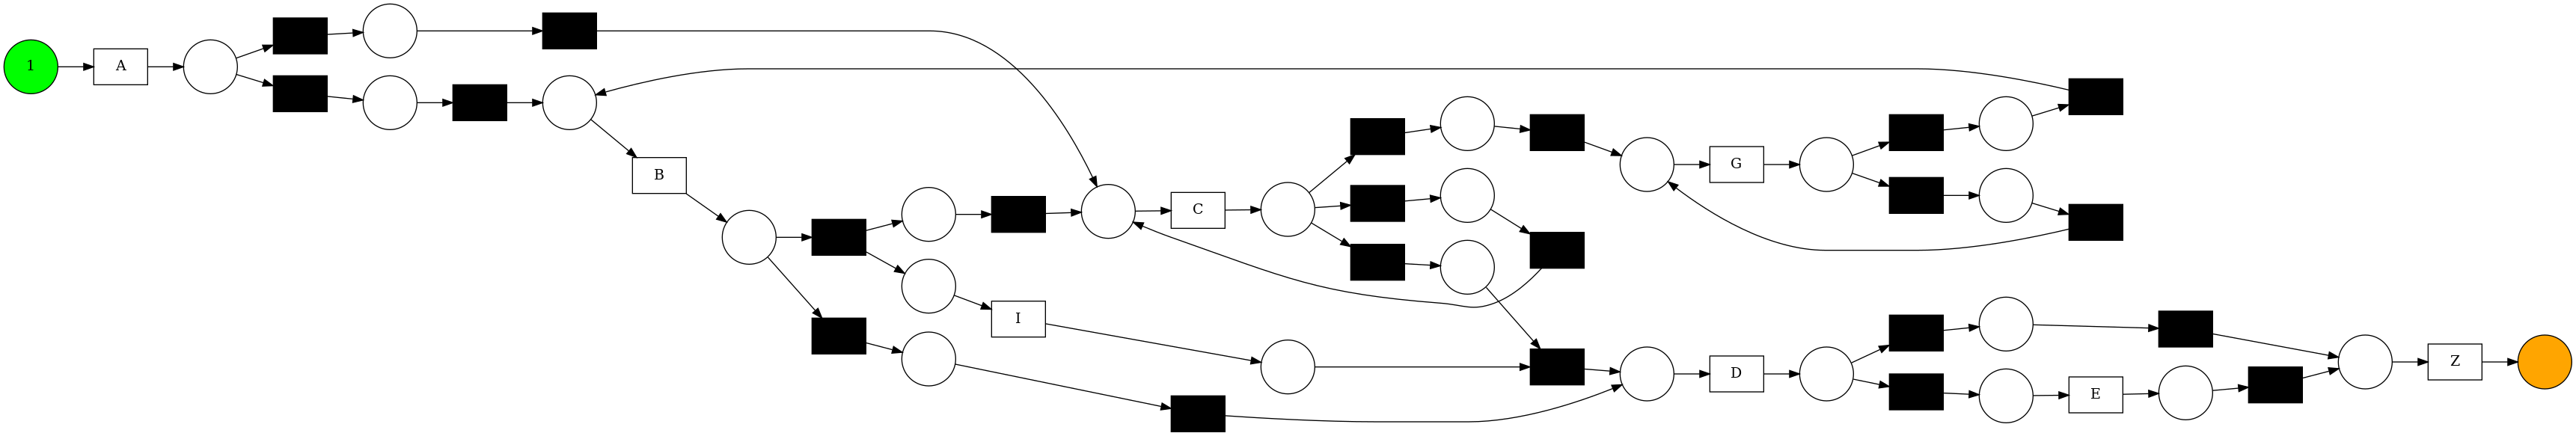

In [215]:
visualization(log, R, True, False)


In [159]:
s=0
for cs in CS : 
    s += len(cs)
print(s)

19


In [160]:


for r in R : 
    print("\n{}".format(r))
    fit_max=0
    fit_max_idx = -1
    for i in range(len(CS)) : 
        C_log = variants_filter.apply(log, CS[i]) 
        net, im, fm = heuristics_miner.apply(C_log)
        r_log = variants_filter.apply(log, r) 
        try : 
            fit = replay_factory.apply(r_log, net, im, fm )['averageFitness']
            print("\t", fit, r, CS[i])
        except : 
            print('avgfitness not exist')
            fit = 0

        if fit_max < fit : 
            fit_max = fit
            fit_max_idx=i
    print("{} is added to {} cluster with fitness{}".format(r, fit_max_idx,fit_max))
    CS[i].append(r)
    


A,C,C,C,C,G,G,G,G,B,D,Z
	 0.5 A,C,C,C,C,G,G,G,G,B,D,Z ['A,B,C,D,Z', 'A,C,B,D,Z', 'A,B,C,D,E,Z', 'A,F', 'A,C,G,B,D,Z', 'A,C,B,D,E,Z']
	 0.4444444444444446 A,C,C,C,C,G,G,G,G,B,D,Z ['A,H,B,C,D,Z', 'A,I,B,C,D,Z', 'A,K,B,C,D,E,Z', 'A,I,B,C,D,E,Z', 'A,B,C,I,D,Z', 'A,K,B,C,D,Z']
	 0.6470588235294115 A,C,C,C,C,G,G,G,G,B,D,Z ['A,I,C,B,D,Z', 'A,C,G,B,D,E,Z', 'A,H,C,B,D,Z', 'A,H,C,B,D,E,Z']
	 0.4705882352941177 A,C,C,C,C,G,G,G,G,B,D,Z ['J,A,B,C,D,Z', 'A,I,H,B,C,D,Z', 'A,B,C,H,D,Z']
A,C,C,C,C,G,G,G,G,B,D,Z is added to 2 cluster with fitness0.6470588235294115

A,B,C,I,D,E,Z
	 0.8888888888888892 A,B,C,I,D,E,Z ['A,B,C,D,Z', 'A,C,B,D,Z', 'A,B,C,D,E,Z', 'A,F', 'A,C,G,B,D,Z', 'A,C,B,D,E,Z']
	 0.9230769230769232 A,B,C,I,D,E,Z ['A,H,B,C,D,Z', 'A,I,B,C,D,Z', 'A,K,B,C,D,E,Z', 'A,I,B,C,D,E,Z', 'A,B,C,I,D,Z', 'A,K,B,C,D,Z']
	 0.75 A,B,C,I,D,E,Z ['A,I,C,B,D,Z', 'A,C,G,B,D,E,Z', 'A,H,C,B,D,Z', 'A,H,C,B,D,E,Z']
	 0.8333333333333334 A,B,C,I,D,E,Z ['J,A,B,C,D,Z', 'A,I,H,B,C,D,Z', 'A,B,C,H,D,Z', 'A,C,C,C,C,G,G,G,G

In [161]:
s=0
for cs in CS : 
    s += len(cs)
print(s)

26


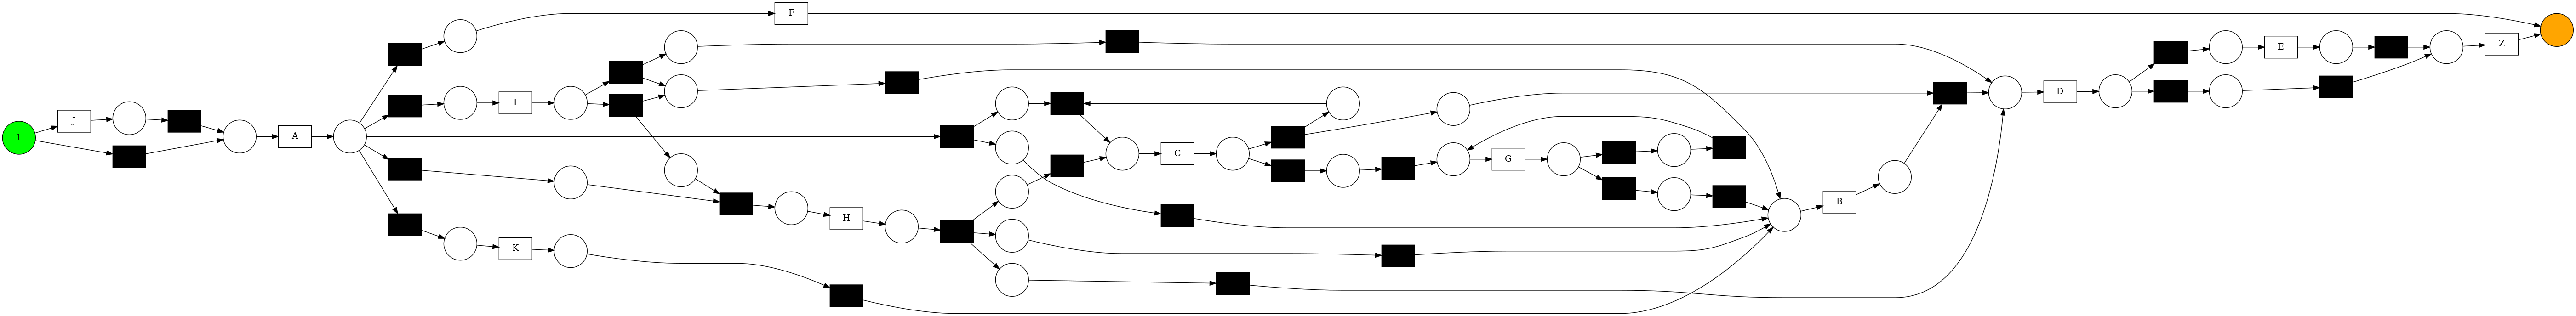

In [162]:
visualization(log, VARIANT, True, False)


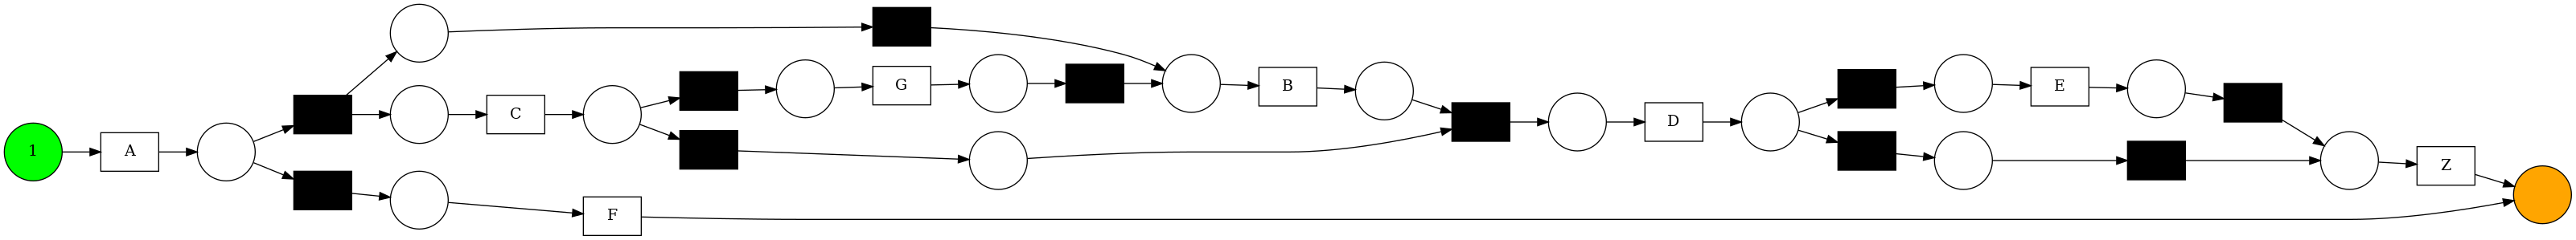

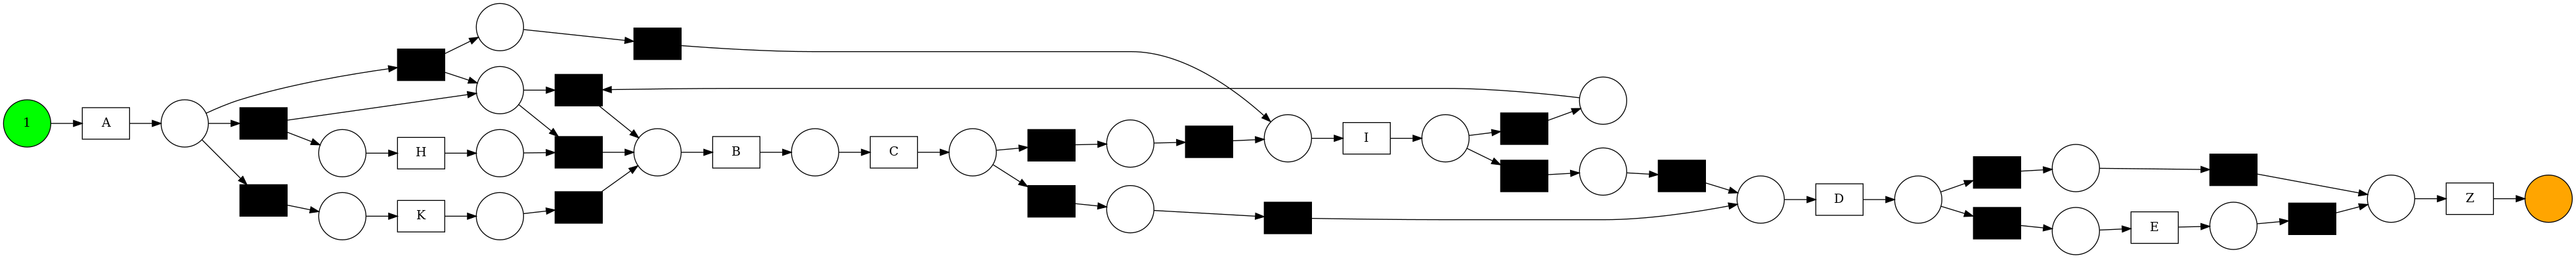

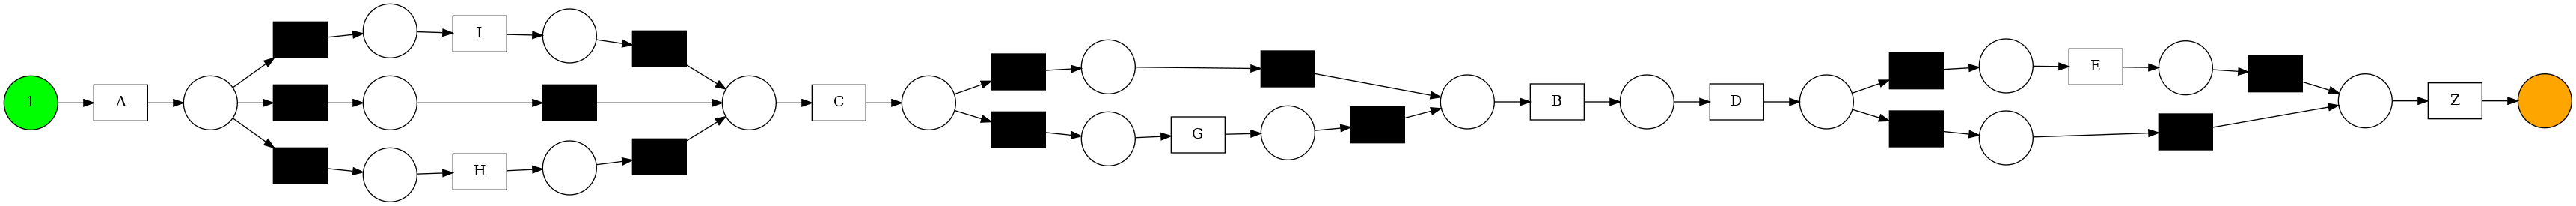

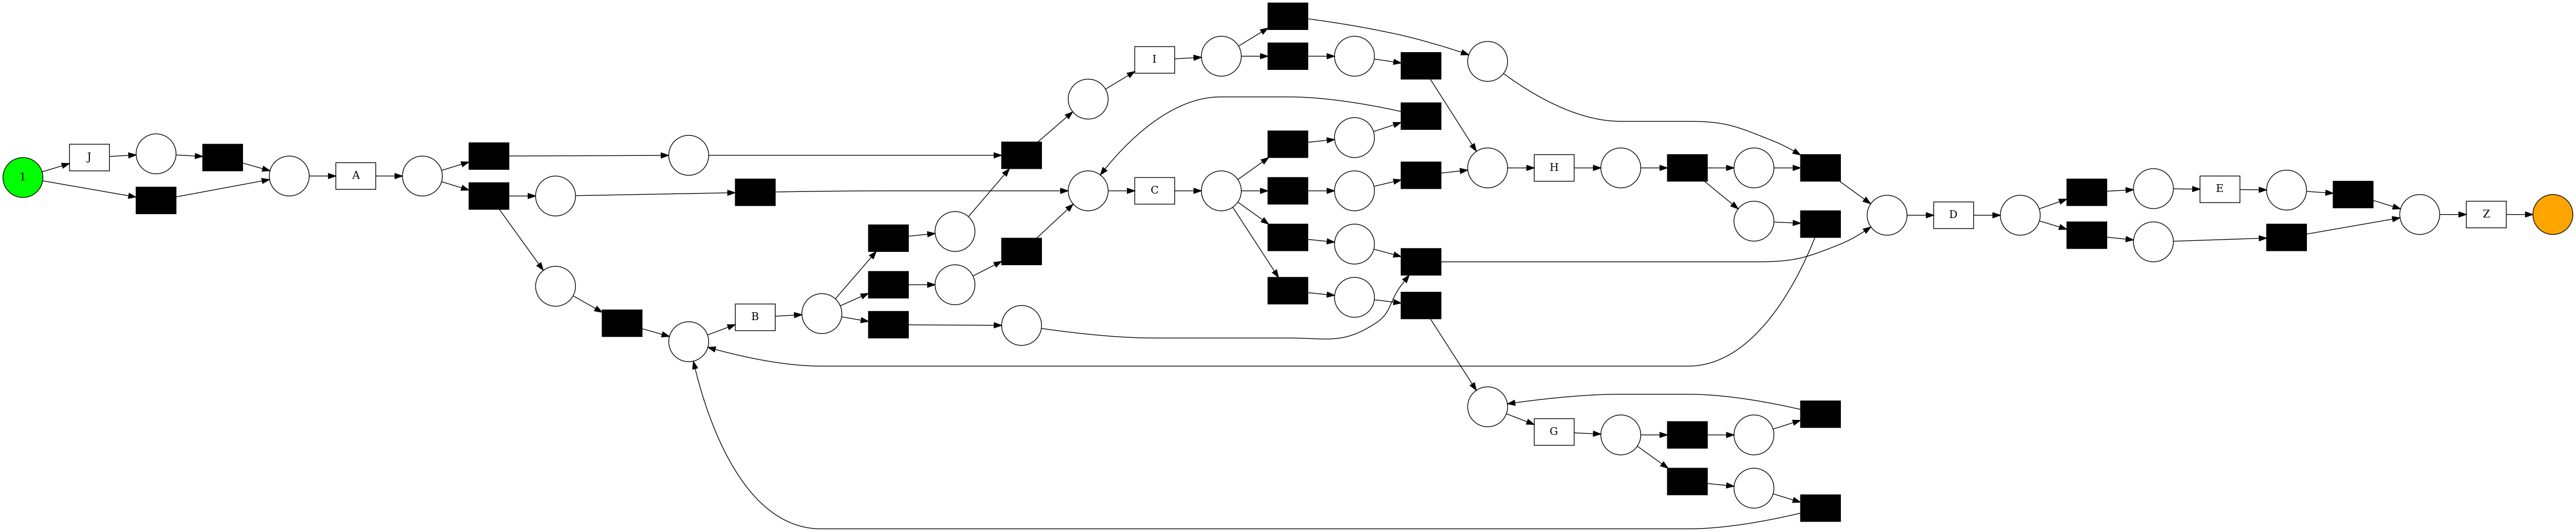

In [163]:
for cs in CS : 
    visualization(log, cs, True, False)


In [45]:
#for f1 score measurement 
# RECALL can be approximated by fitness
# ACCURACY can be approximated by precision
from pm4py.evaluation.precision import evaluator as precision_evaluator
net, im, fm = heuristics_miner.apply(variants_filter.apply(log, C))
prec = precision_evaluator.apply(log, net, im, fm, variant=precision_evaluator.Variants.ETCONFORMANCE_TOKEN)

In [ ]:
#for complexity measurement
places = net.places
transitions = net.transitions
arcs = net.arcs

# N GRAM Clustering

In [230]:
def ngram_generator (arr, n) : 
    print(arr)
    ngram_array=[]
    for i in range(len(arr) - n +1 ) :
        ar = arr[i:i+n]
        ngram_array.append(','.join(ar))
    return ngram_array    

In [231]:
gram=[]
for v in VARIANT : 
    g=list(set(ngram_generator(v.split(','),3)))
    gram.append(g)

['B', 'C', 'H', 'A', 'G', 'F', 'D', 'E']
['B', 'C', 'J', 'H', 'A', 'G', 'K', 'F', 'D', 'E']
['B', 'C', 'M', 'N', 'A', 'G', 'F', 'D', 'E']
['B', 'C', 'J', 'M', 'N', 'A', 'G', 'K', 'F', 'D', 'E']
['A', 'G', 'K', 'F', 'D', 'E']
['B', 'P', 'H', 'A', 'Q', 'F', 'D', 'E']
['A', 'G', 'F', 'D', 'E']
['B', 'H', 'A', 'F', 'D', 'E']
['B', 'C', 'H', 'A', 'L', 'I', 'A', 'G', 'F', 'D', 'E']
['B', 'C', 'A', 'G', 'H', 'F', 'D', 'E']
['B', 'C', 'A', 'G', 'J', 'K', 'H', 'F', 'D', 'E']
['B', 'C', 'J', 'H', 'A', 'L', 'I', 'A', 'G', 'K', 'F', 'D', 'E']
['B', 'M', 'N', 'A', 'F', 'D', 'E']
['A', 'L', 'I']
['B', 'C', 'H', 'A', 'G', 'K', 'F', 'D', 'E']
['B', 'C', 'A', 'G', 'F', 'H', 'D', 'E']
['B', 'C', 'M', 'N', 'A', 'G', 'T', 'U', 'D', 'E']
['B', 'C', 'J', 'H', 'A', 'L', 'I']
['A', 'F', 'D', 'E']
['B', 'C', 'H', 'A', 'L', 'I']
['B', 'P', 'H', 'A', '3', 'I', 'A', 'Q', 'F', 'D', 'E']
['B', 'P', 'M', 'N', 'A', 'Q', 'F', 'D', 'E']
['B', 'C', 'M', 'N', 'A', 'L', 'I', 'A', 'G', 'F', 'D', 'E']
['B', 'C', 'X', 'O', '

In [232]:
def extract_feature_kgram(gram_arr) : 
    features = set()
    for gram in gram_arr : 
        for g in gram : 
            features.add(g)
    return features

In [233]:
features=extract_feature_kgram(gram)

In [234]:
import pandas as pd

In [235]:
feature_space=list(features)
result=pd.DataFrame(columns=feature_space)
for g in gram : 
    A=pd.DataFrame(np.ones((1,len(g))), columns=g)
    result=result.append(A)
result=result.fillna(0)

In [243]:
data=np.array(result)

In [244]:
from sklearn.cluster import KMeans

In [245]:
kmeans = KMeans(n_clusters=8, random_state=0).fit(data)

In [246]:
len(kmeans.labels_)

202

In [247]:
np.unique(kmeans.labels_)

array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int32)

In [251]:
count(kmeans.labels_)

NameError: name 'count' is not defined

In [253]:
unique, counts = np.unique(kmeans.labels_, return_counts=True)
dict(zip(unique, counts))

# {0: 7, 1: 4, 2: 1, 3: 2, 4: 1}

{0: 12, 1: 38, 2: 82, 3: 13, 4: 12, 5: 12, 6: 27, 7: 6}

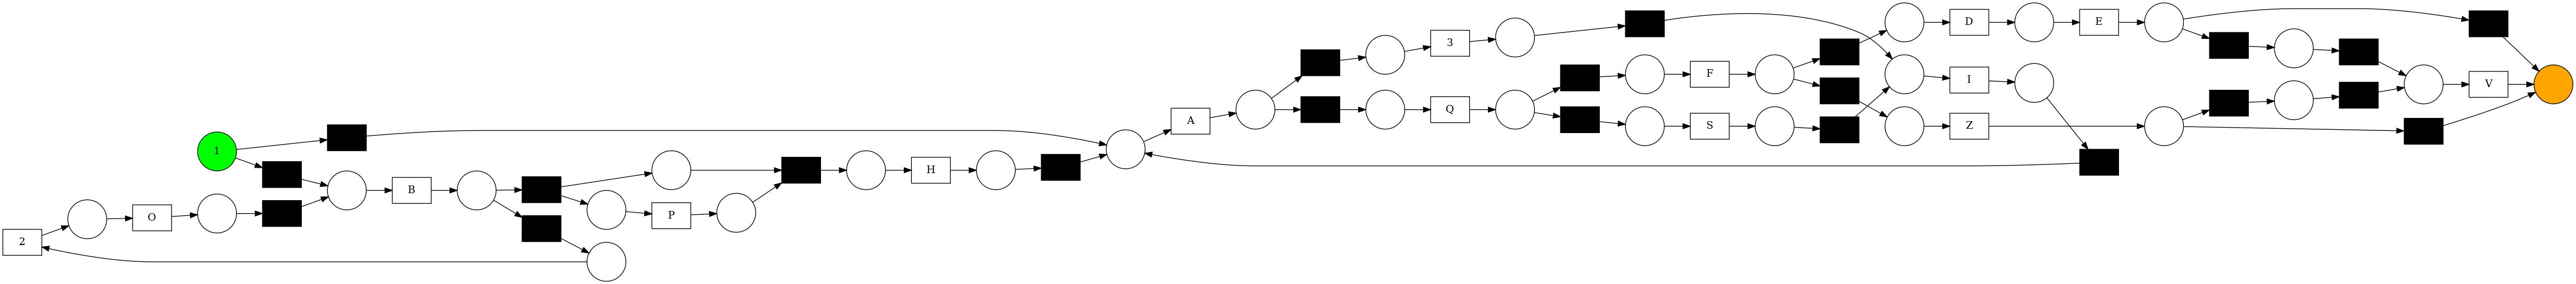

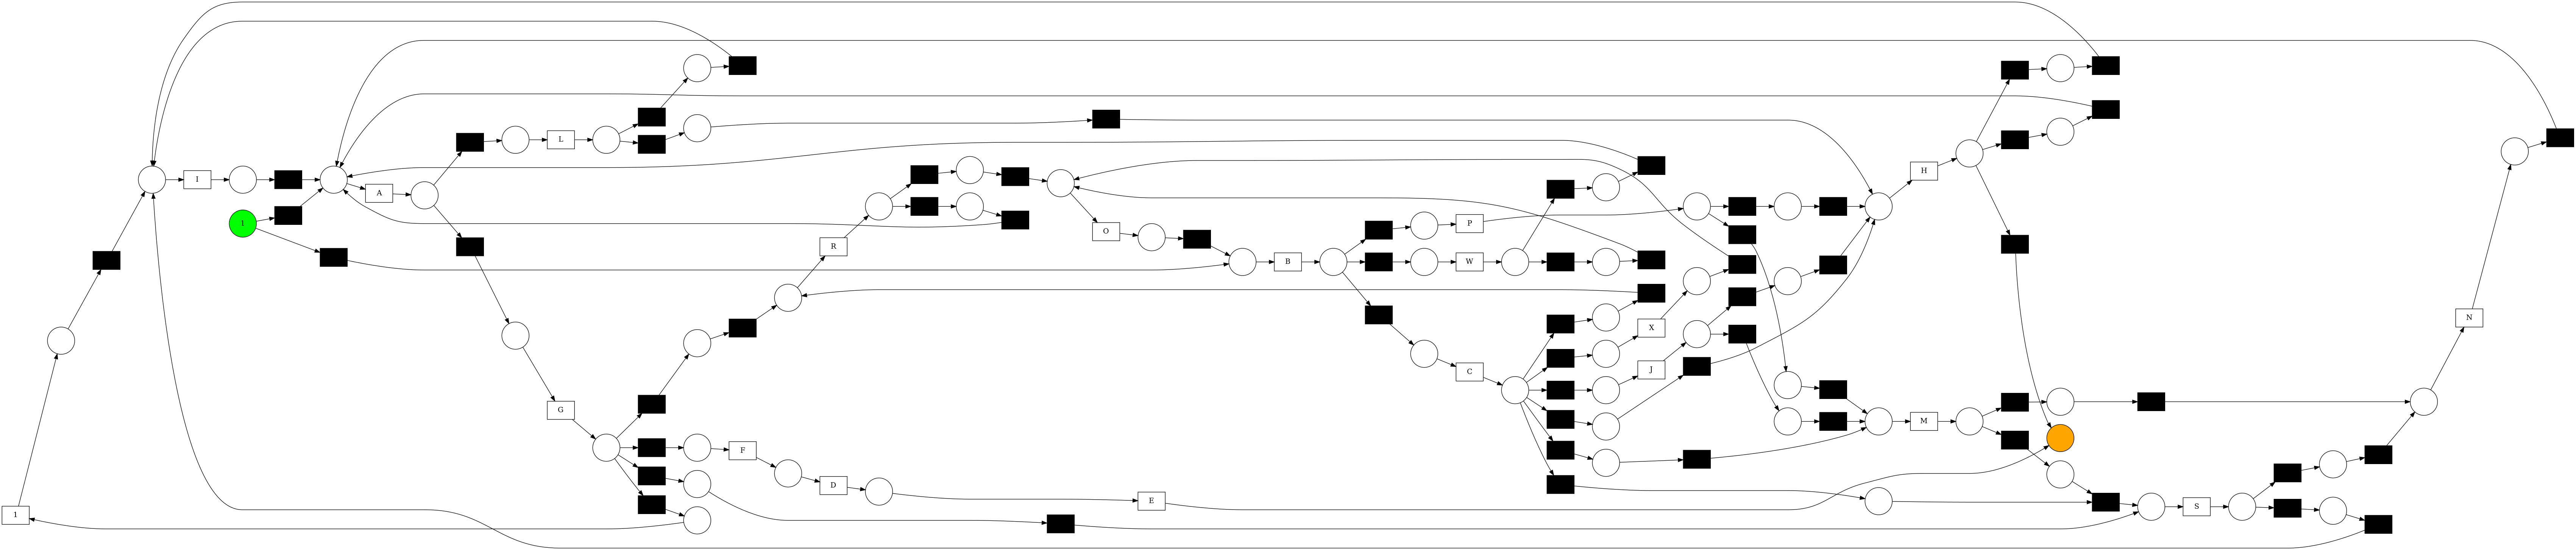

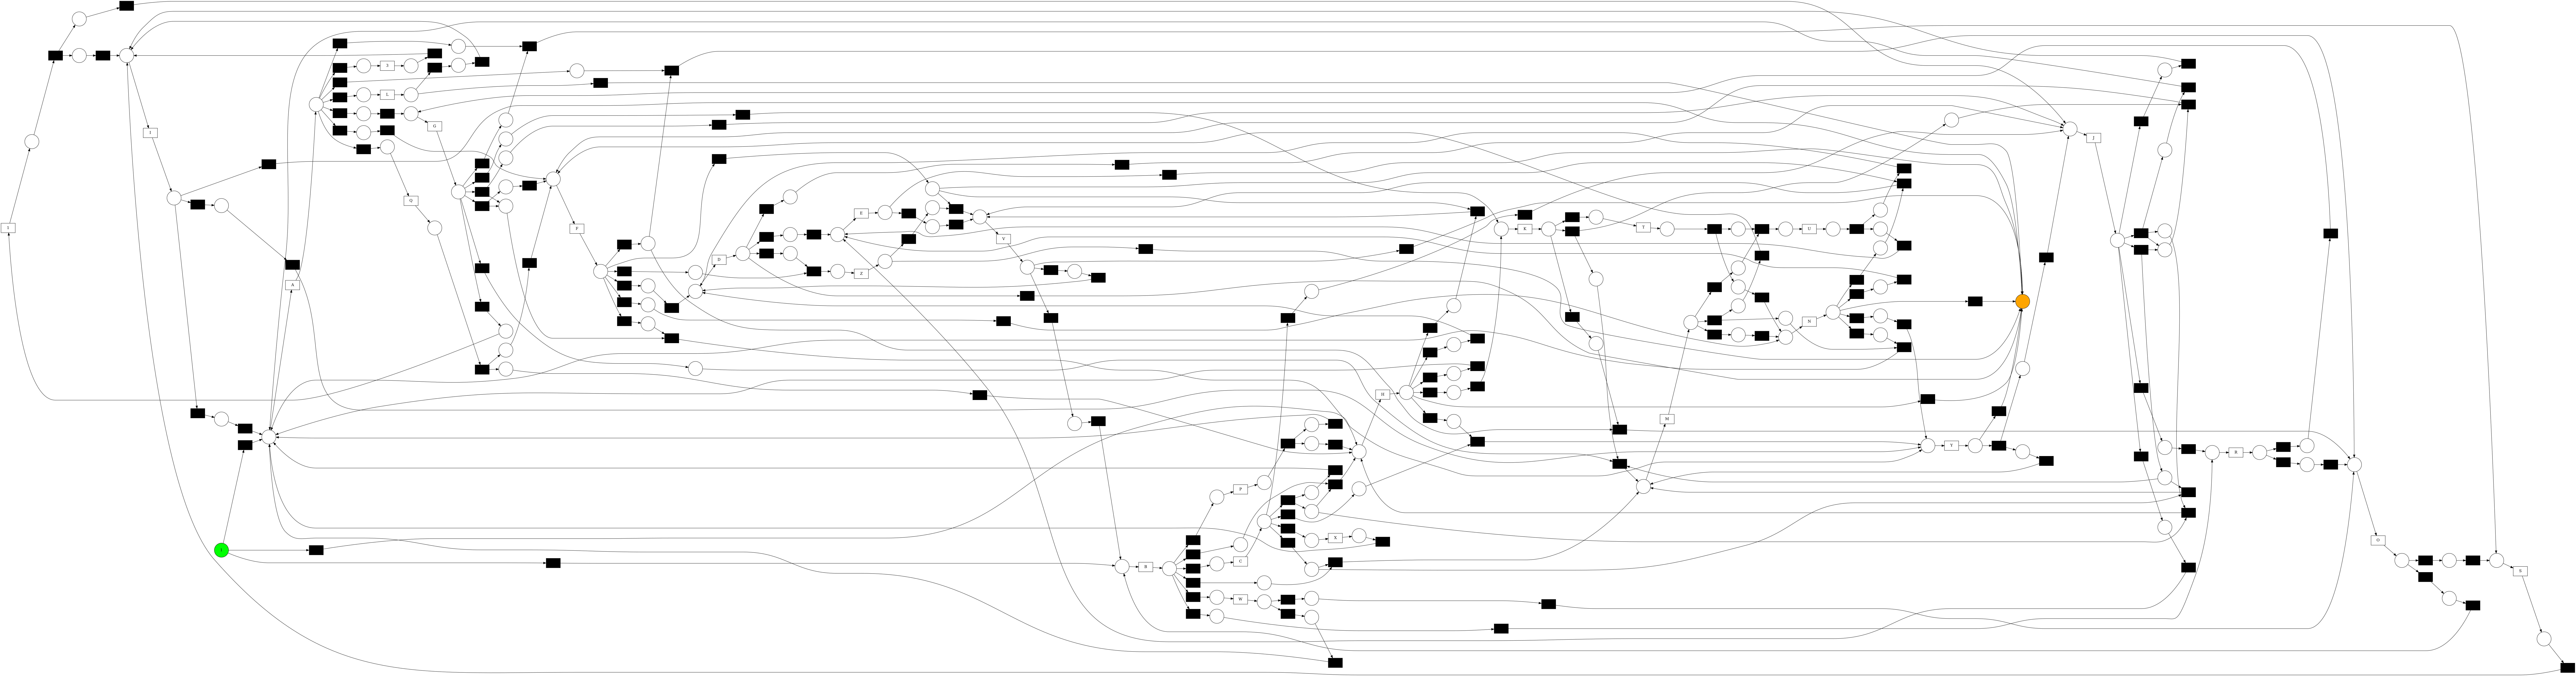

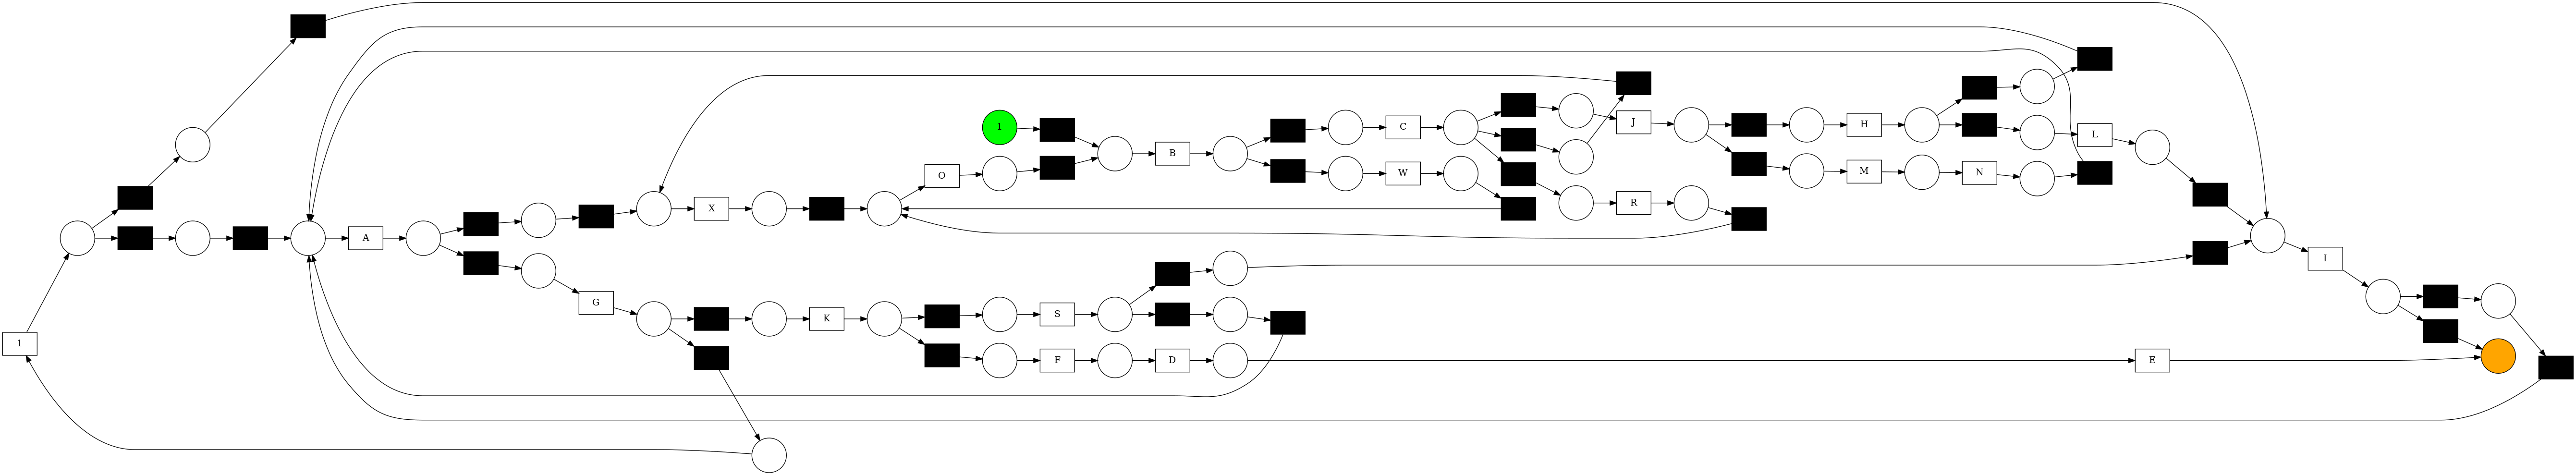

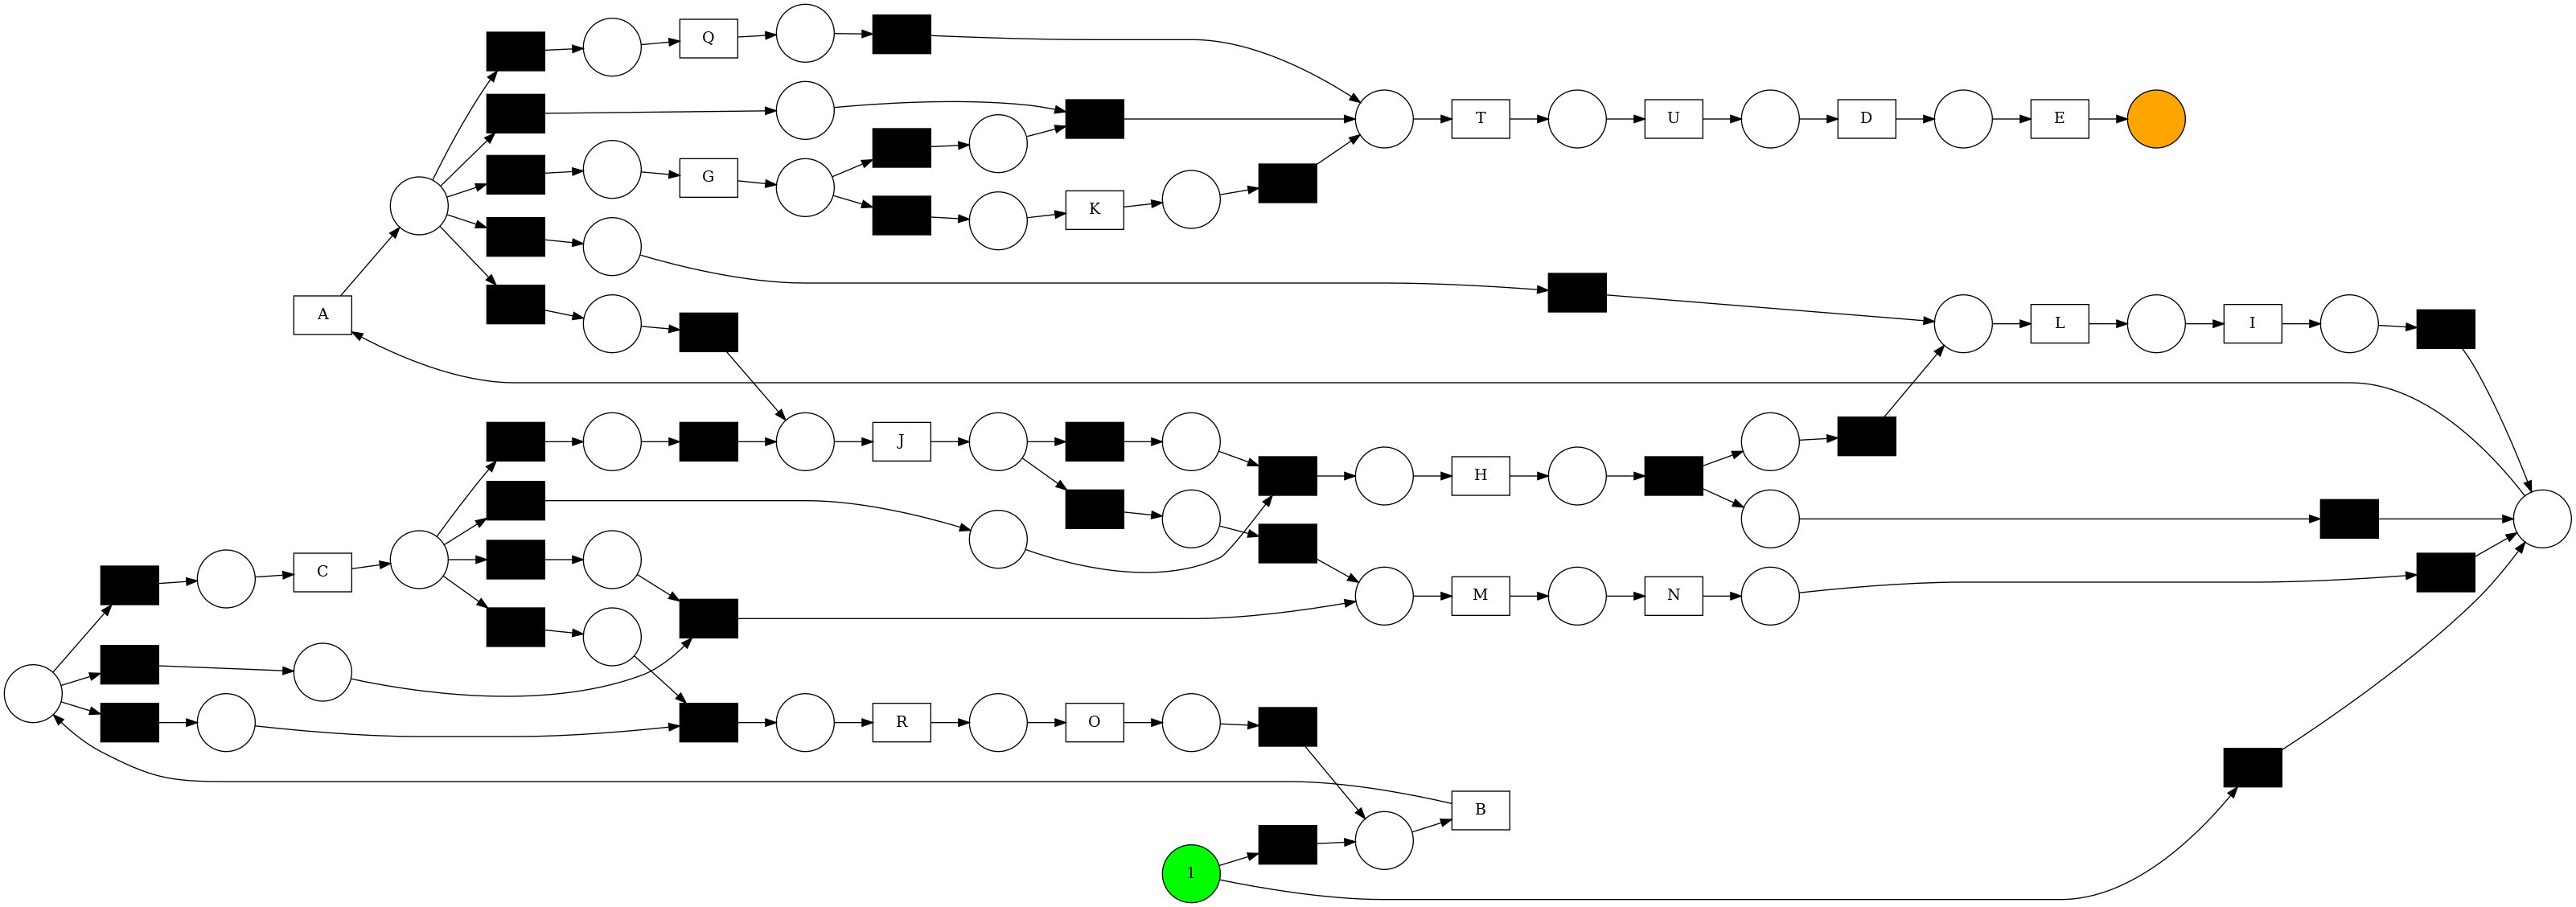

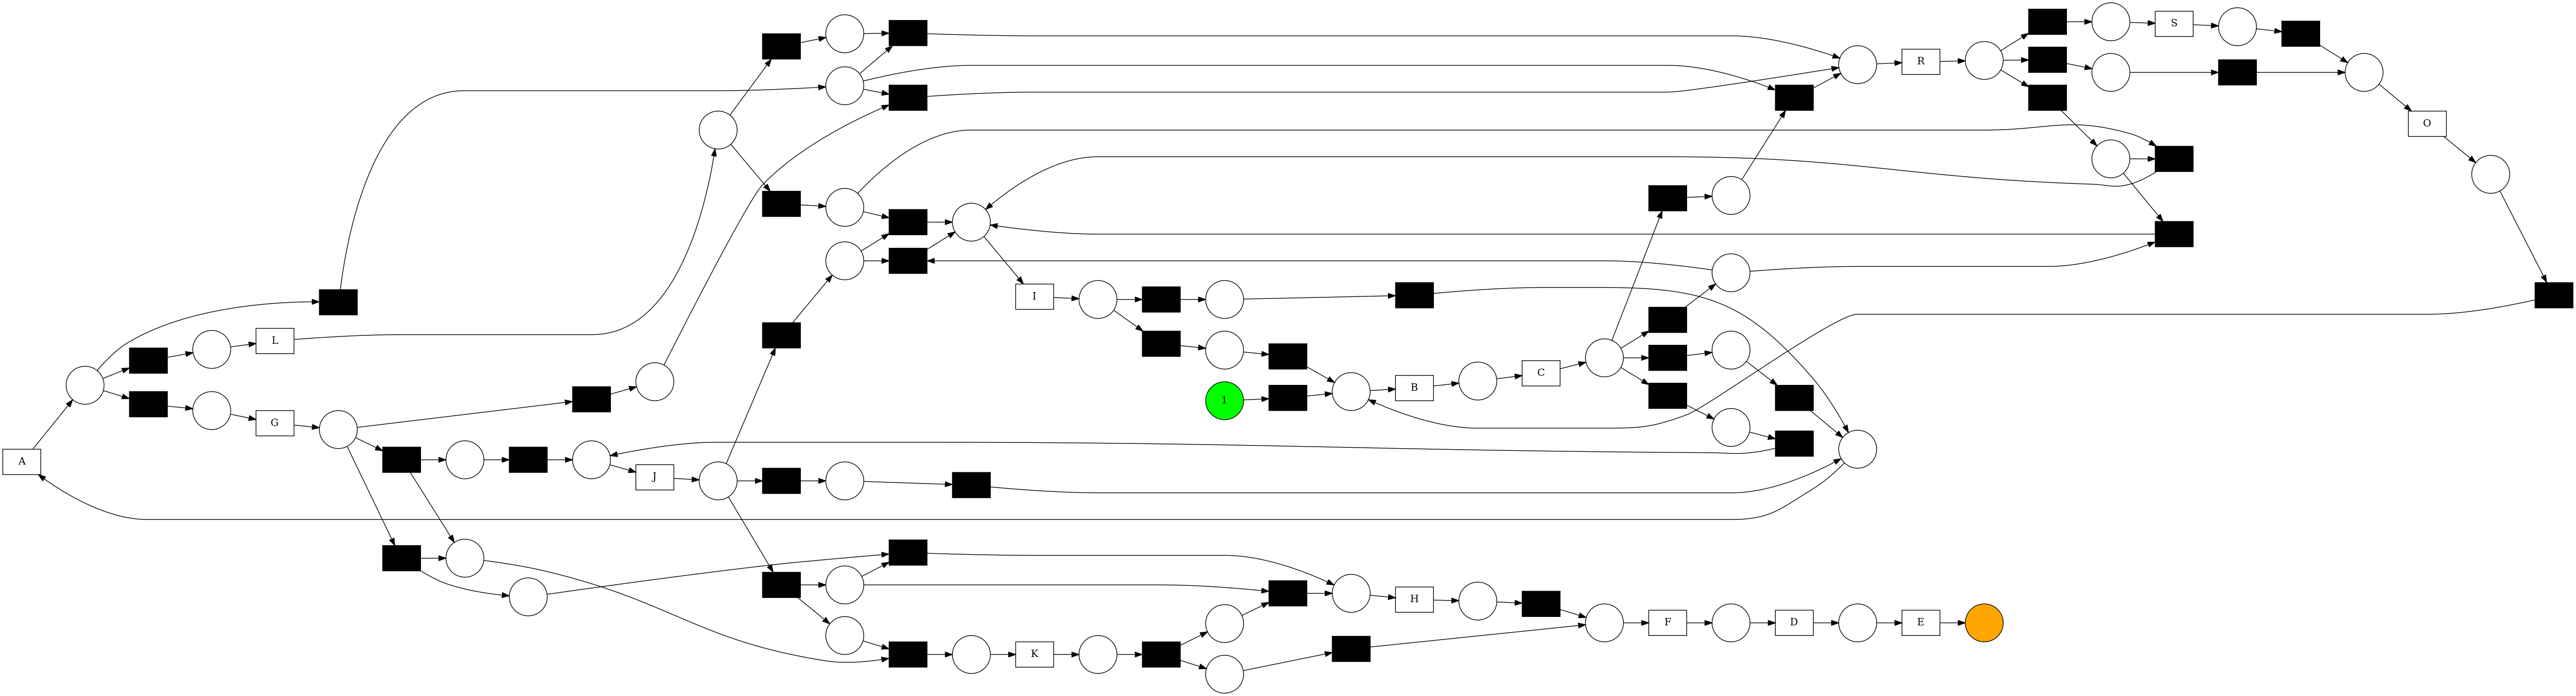

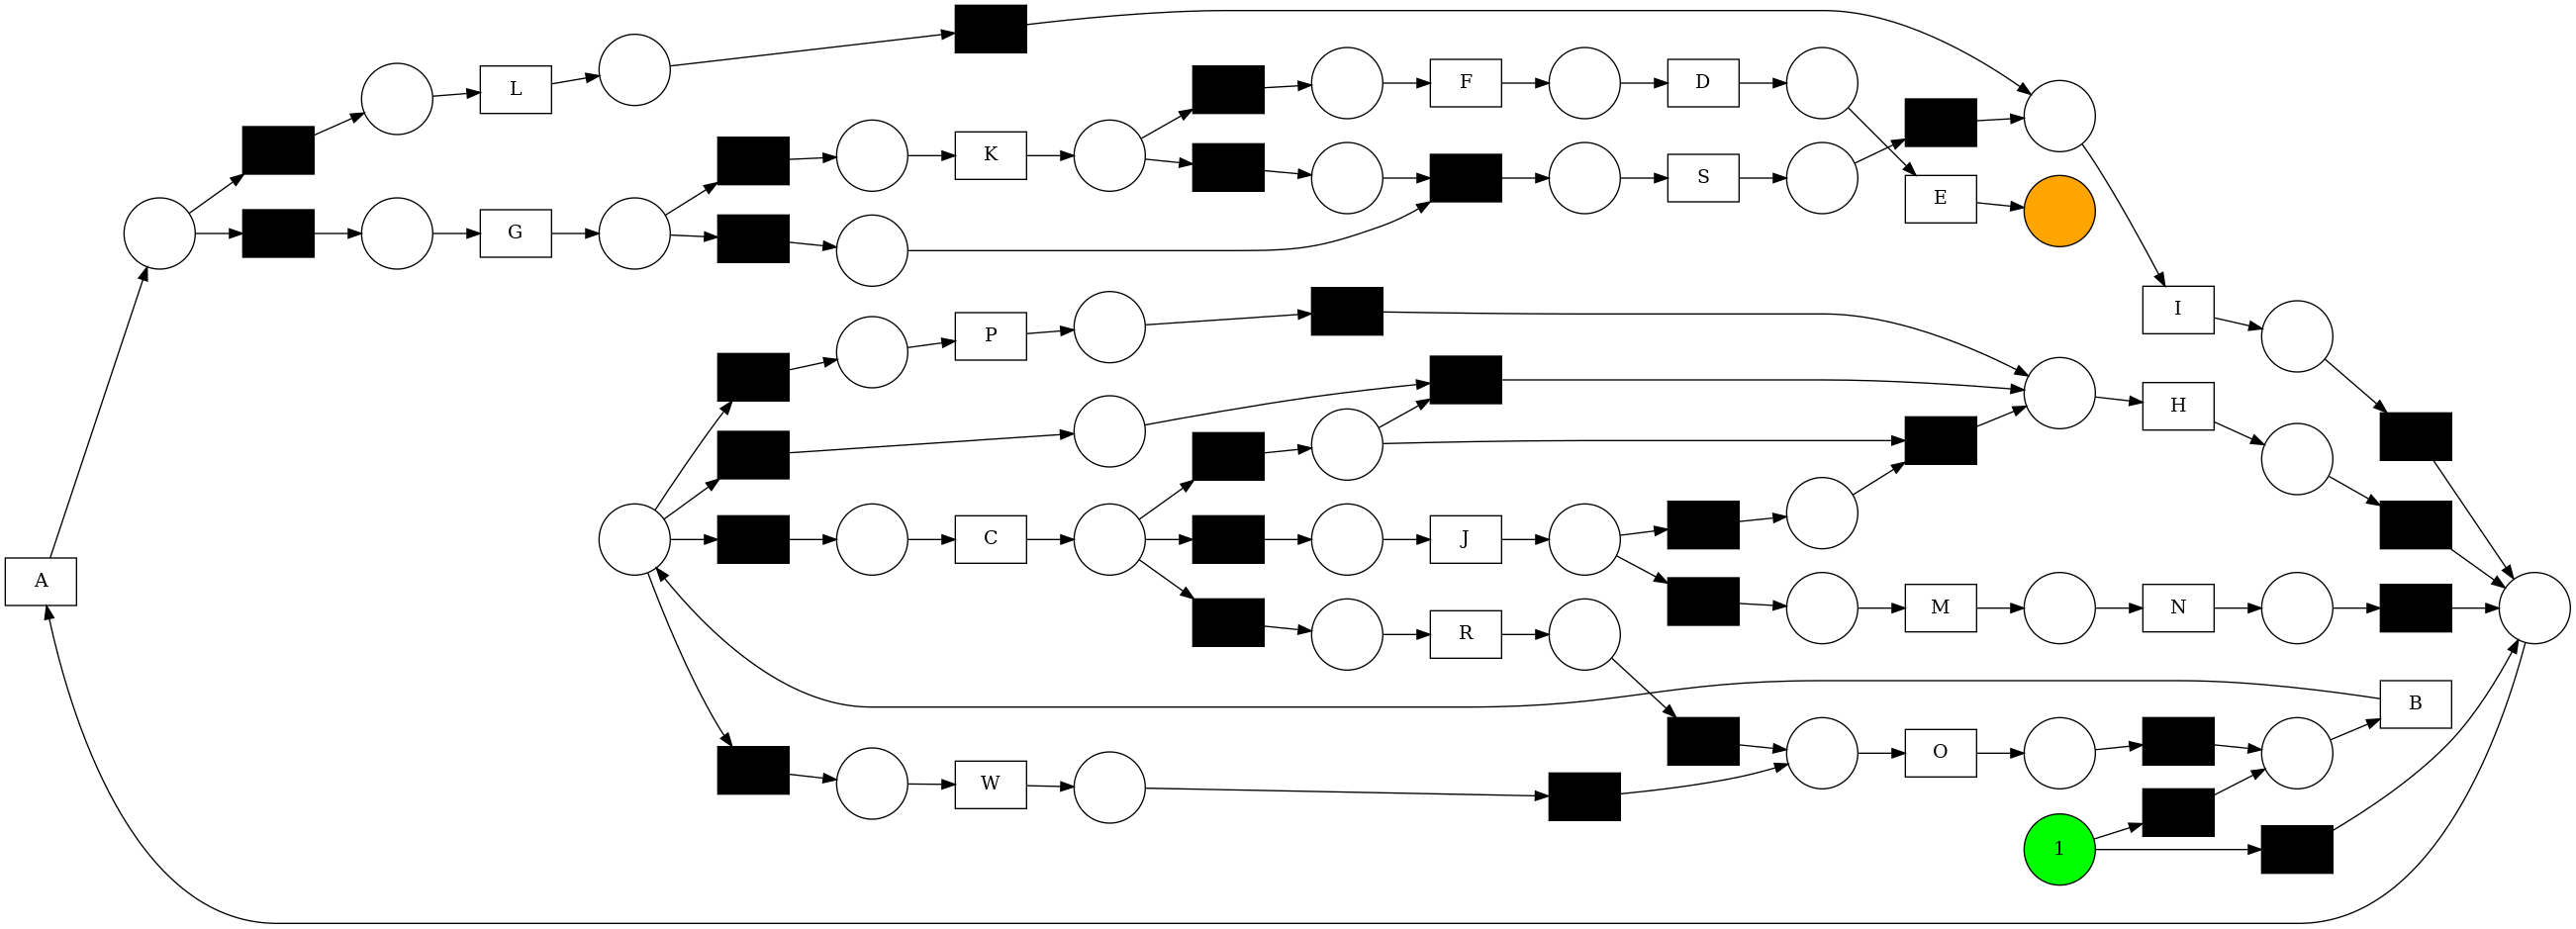

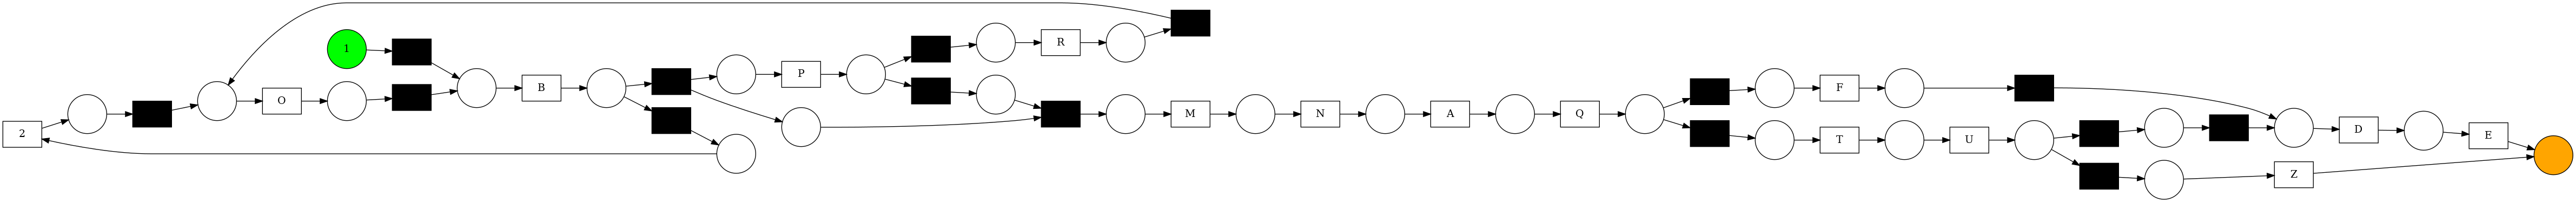

In [248]:
for i in np.unique(kmeans.labels_) : 
    c=np.array(VARIANT)[kmeans.labels_ == i]
    visualization(log, c, True, False)
    

# BOA (BACK OF ACTIVITIES)

In [217]:
def boa_feature_generator(variant_list) : 
    features = set()
    for v in variant_list : 
        features = features.union(set(v.split(',')))
    return features

In [218]:
features=pd.DataFrame(columns=list(boa_feature_generator(VARIANT)))

In [219]:
feature_space=list(features)
result=pd.DataFrame(columns=feature_space)
for variant in VARIANT :
    v=list(set(variant.split(',')))
    print(v)
    A=pd.DataFrame(np.ones((1,len(v))), columns=v)
    result=result.append(A)
result=result.fillna(0)

['F', 'C', 'D', 'G', 'B', 'A', 'E', 'H']
['F', 'C', 'D', 'K', 'G', 'B', 'A', 'E', 'H', 'J']
['F', 'D', 'G', 'B', 'M', 'A', 'E', 'N', 'C']
['F', 'D', 'K', 'G', 'B', 'M', 'A', 'E', 'N', 'C', 'J']
['F', 'D', 'K', 'G', 'A', 'E']
['F', 'D', 'B', 'Q', 'A', 'P', 'E', 'H']
['F', 'D', 'G', 'A', 'E']
['F', 'D', 'B', 'A', 'E', 'H']
['I', 'F', 'C', 'D', 'L', 'G', 'B', 'A', 'E', 'H']
['F', 'C', 'D', 'G', 'B', 'A', 'E', 'H']
['F', 'H', 'D', 'K', 'G', 'B', 'A', 'E', 'C', 'J']
['I', 'F', 'C', 'D', 'K', 'L', 'G', 'B', 'A', 'E', 'H', 'J']
['F', 'D', 'B', 'M', 'A', 'N', 'E']
['I', 'A', 'L']
['F', 'C', 'D', 'K', 'G', 'B', 'A', 'E', 'H']
['F', 'H', 'D', 'G', 'B', 'A', 'E', 'C']
['U', 'D', 'G', 'B', 'M', 'A', 'T', 'E', 'N', 'C']
['I', 'C', 'L', 'B', 'A', 'H', 'J']
['D', 'F', 'E', 'A']
['I', 'C', 'L', 'B', 'A', 'H']
['I', 'F', 'D', '3', 'B', 'Q', 'A', 'P', 'E', 'H']
['F', 'D', 'B', 'Q', 'M', 'A', 'P', 'N', 'E']
['I', 'F', 'D', 'L', 'G', 'B', 'M', 'A', 'E', 'N', 'C']
['F', 'H', 'D', 'K', 'G', 'B', 'A', 'O', '

In [220]:
data=np.array(result)

In [221]:
from sklearn.cluster import KMeans

In [226]:
kmeans = KMeans(n_clusters=8, random_state=0).fit(data)

In [227]:
kmeans.labels_

array([0, 0, 4, 4, 6, 3, 6, 3, 2, 0, 0, 2, 1, 6, 0, 0, 4, 5, 6, 5, 3, 1,
       7, 0, 0, 7, 6, 2, 3, 3, 0, 3, 4, 0, 0, 0, 4, 0, 1, 0, 4, 4, 5, 2,
       4, 3, 3, 5, 1, 1, 3, 5, 2, 7, 0, 5, 2, 2, 0, 3, 6, 4, 2, 0, 1, 3,
       5, 0, 3, 3, 1, 1, 1, 3, 5, 5, 4, 0, 5, 5, 5, 2, 4, 4, 0, 4, 0, 0,
       1, 3, 6, 6, 6, 6, 4, 5, 4, 0, 0, 1, 1, 1, 1, 3, 3, 2, 3, 1, 4, 1,
       1, 3, 3, 2, 3, 3, 5, 0, 0, 4, 0, 0, 5, 0, 4, 2, 0, 7, 0, 0, 2, 5,
       7, 7, 5, 4, 5, 7, 4, 5, 7, 5, 5, 7, 4, 4, 5, 2, 2, 2, 0, 5, 0, 0,
       5, 5, 7, 2, 2, 5, 4, 2, 5, 0, 2, 2, 2, 5, 5, 2, 2, 2, 2, 0, 2, 2,
       4, 4, 4, 4, 4, 0, 0, 4, 0, 0, 2, 4, 4, 5, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6], dtype=int32)

In [228]:
np.unique(kmeans.labels_)

array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int32)

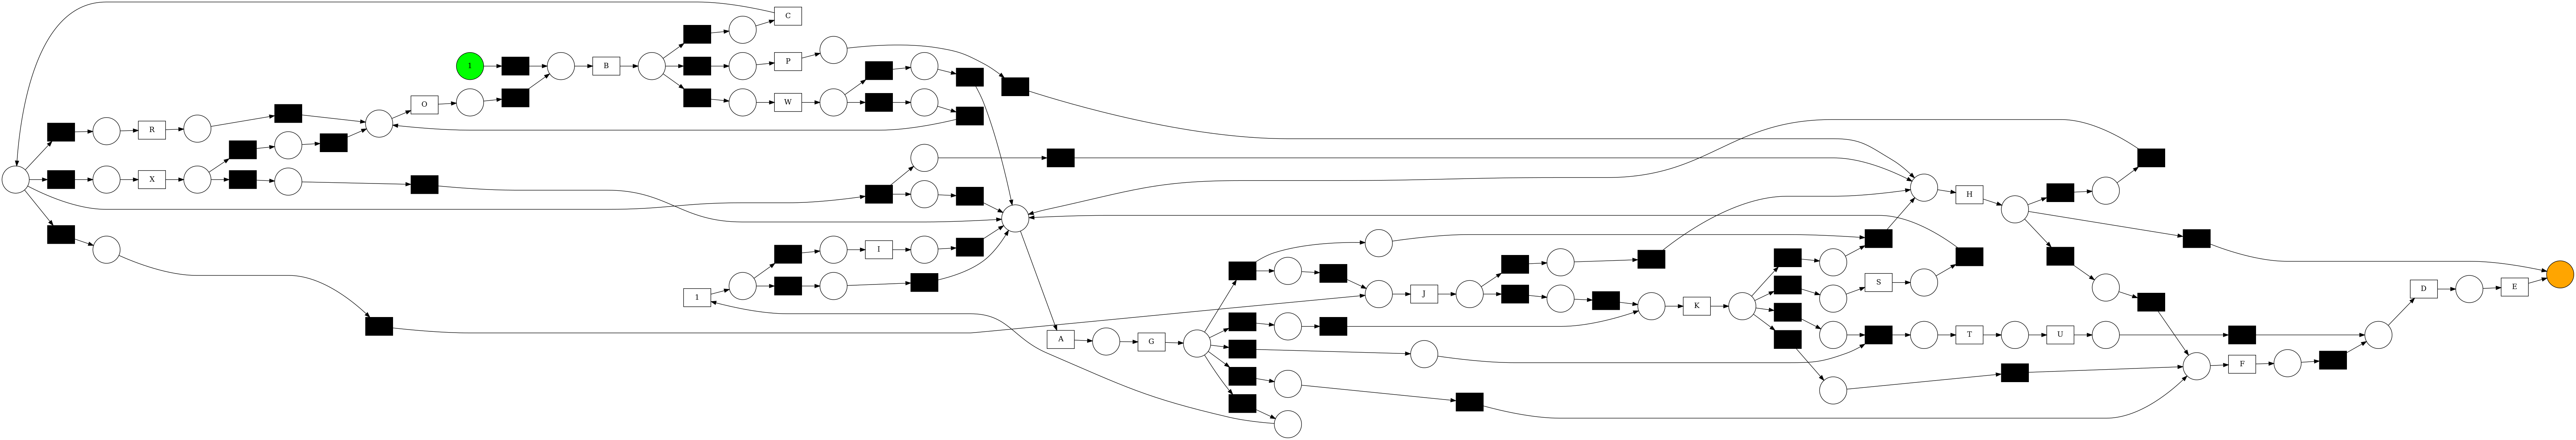

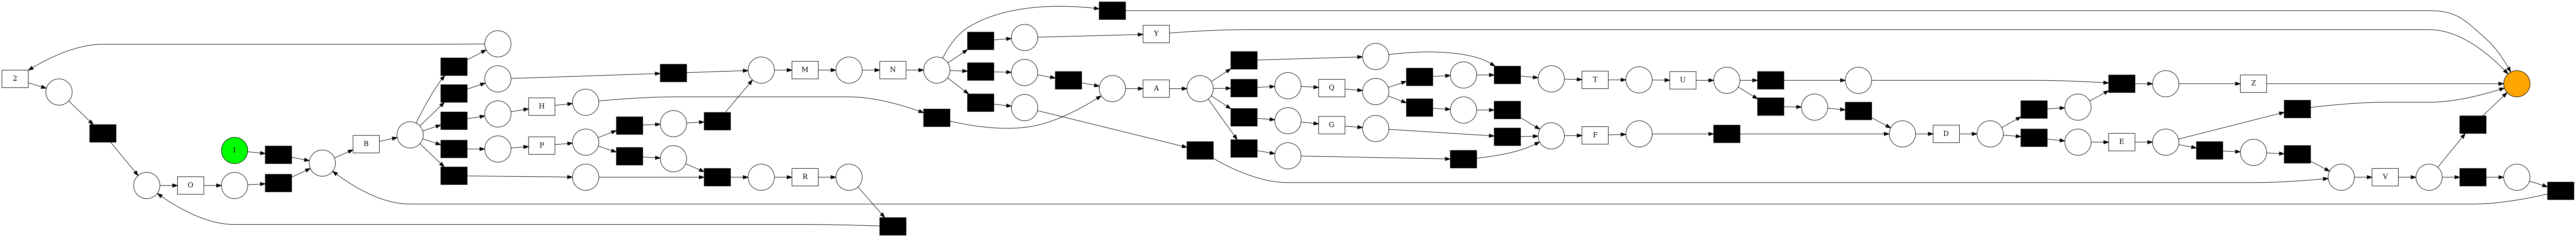

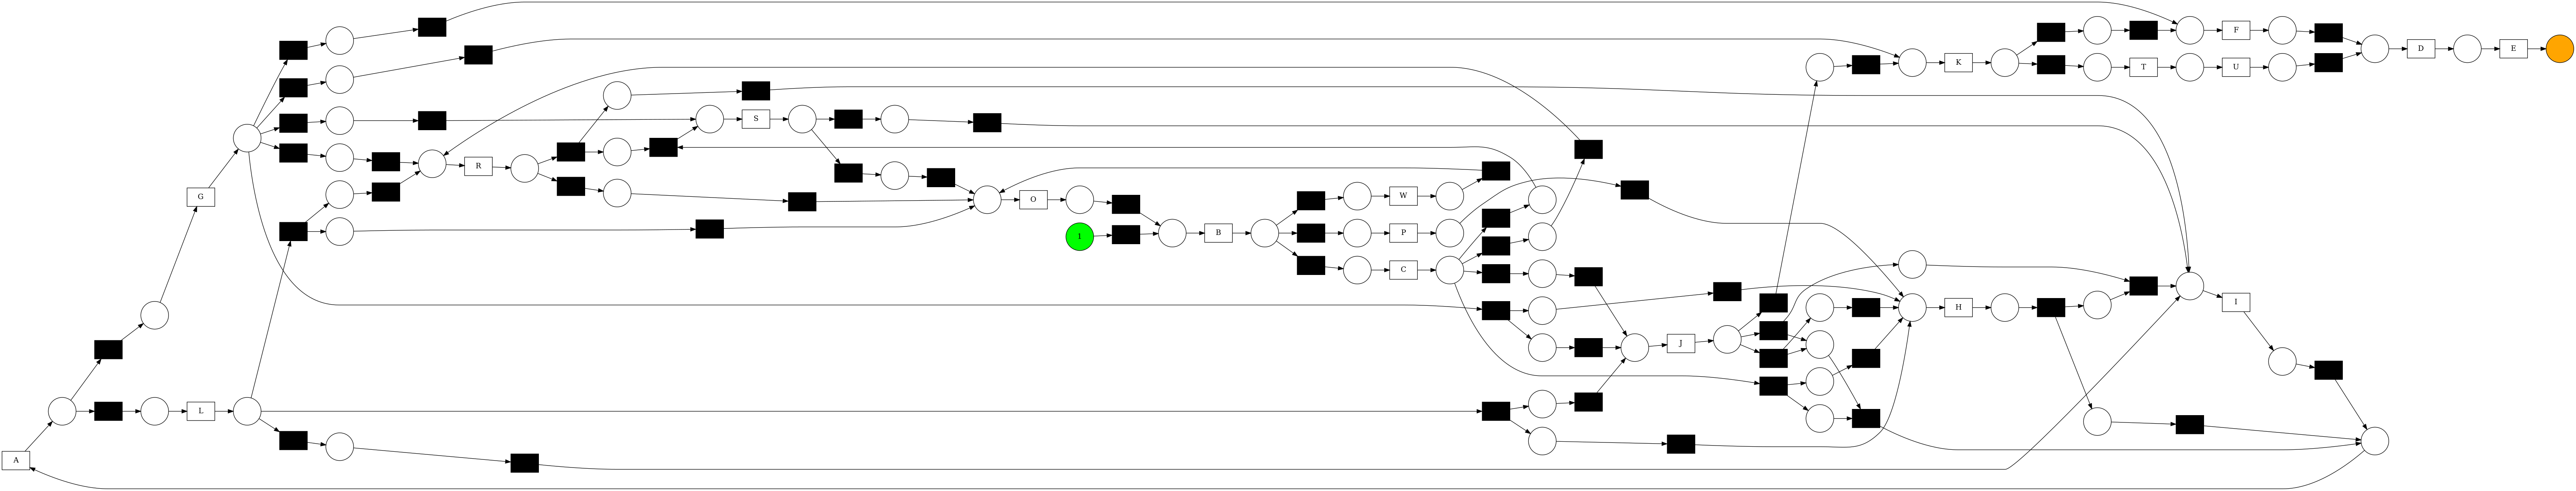

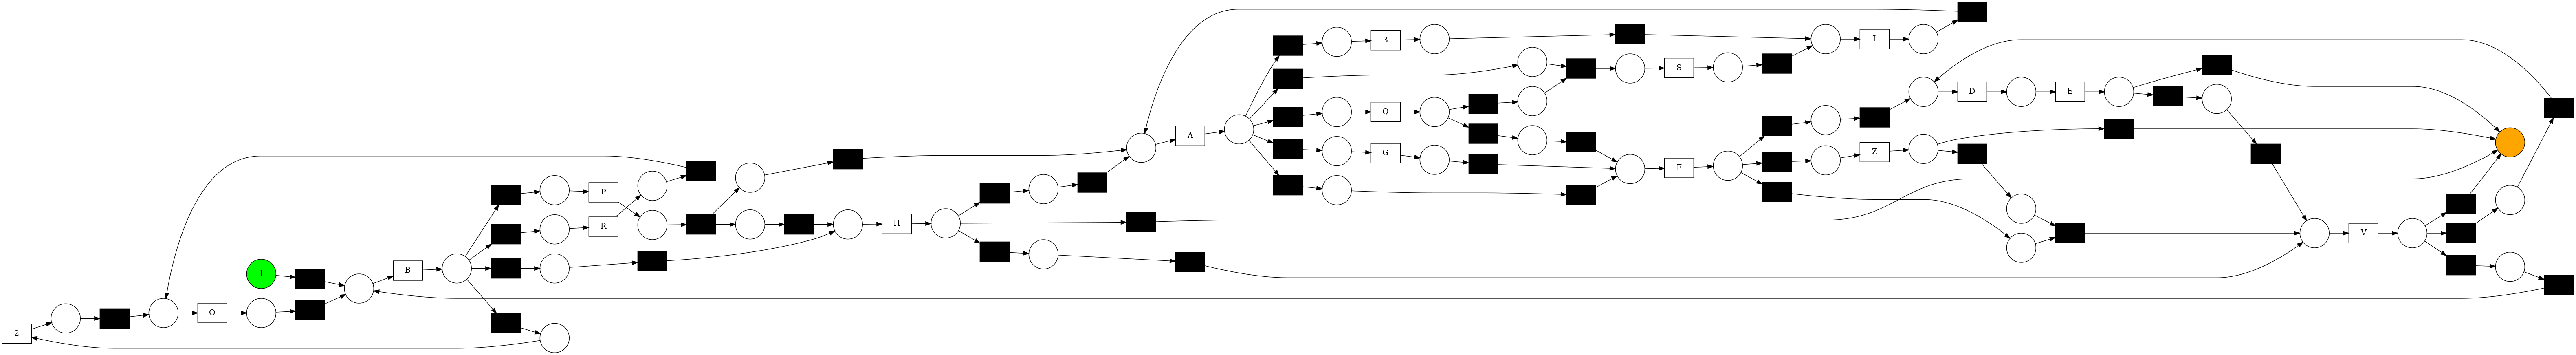

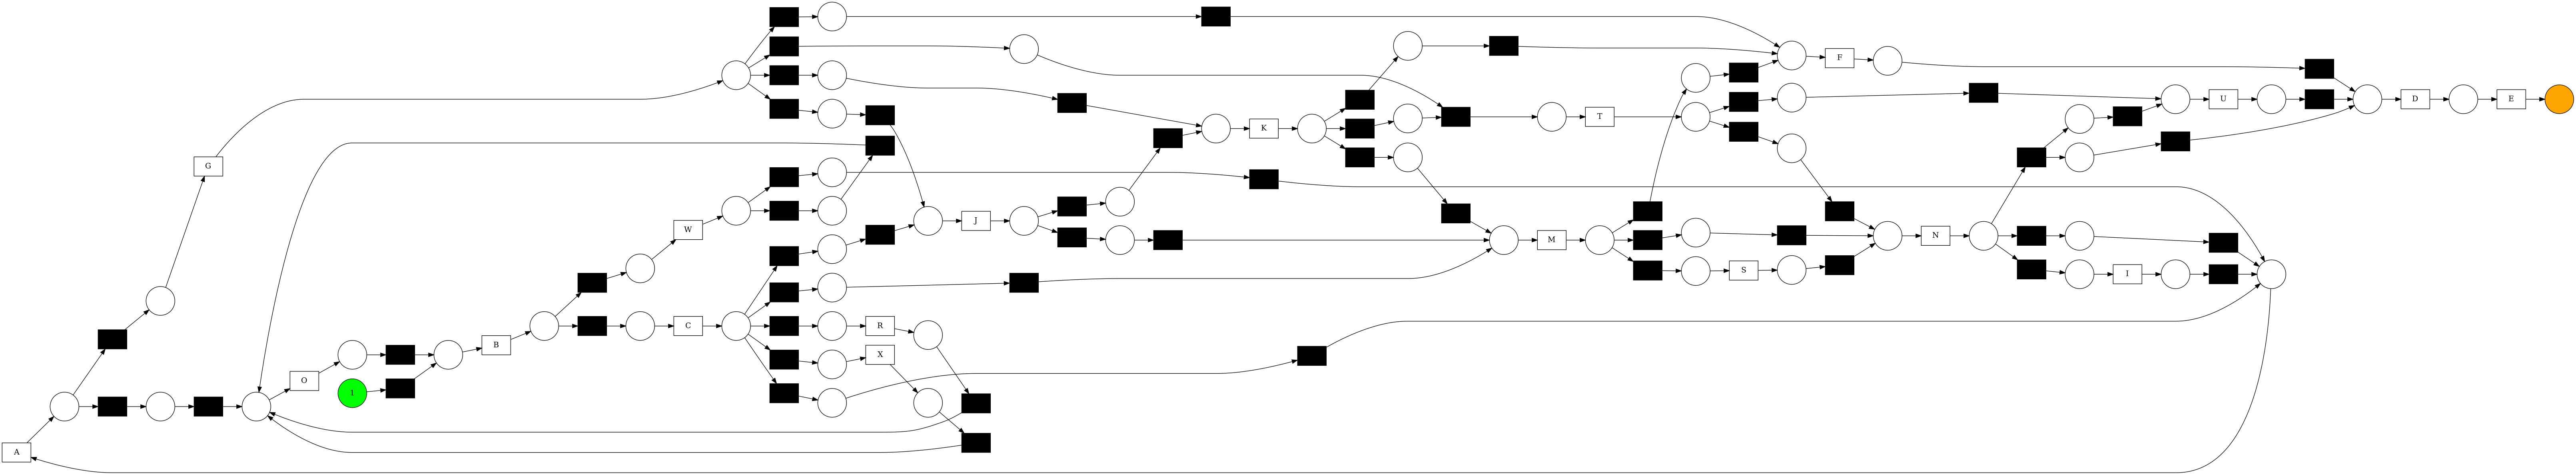

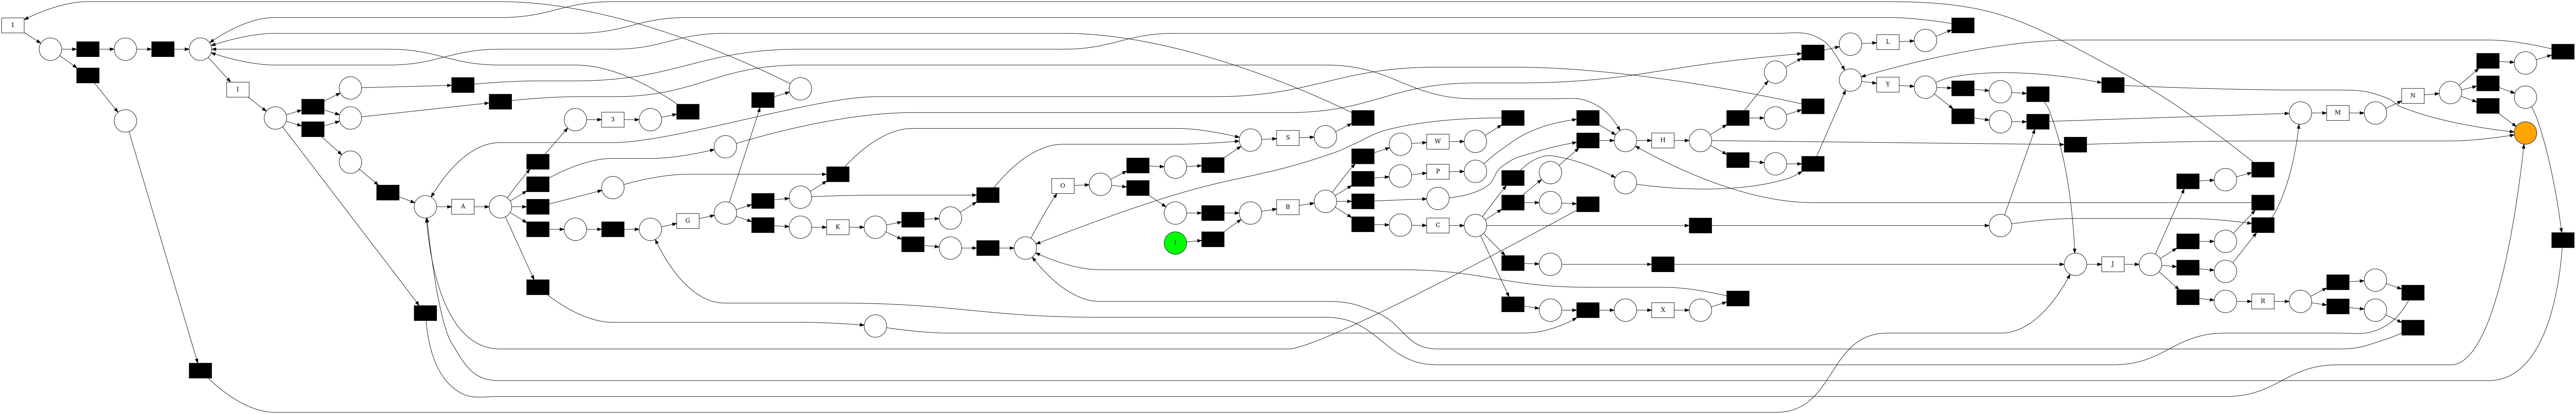

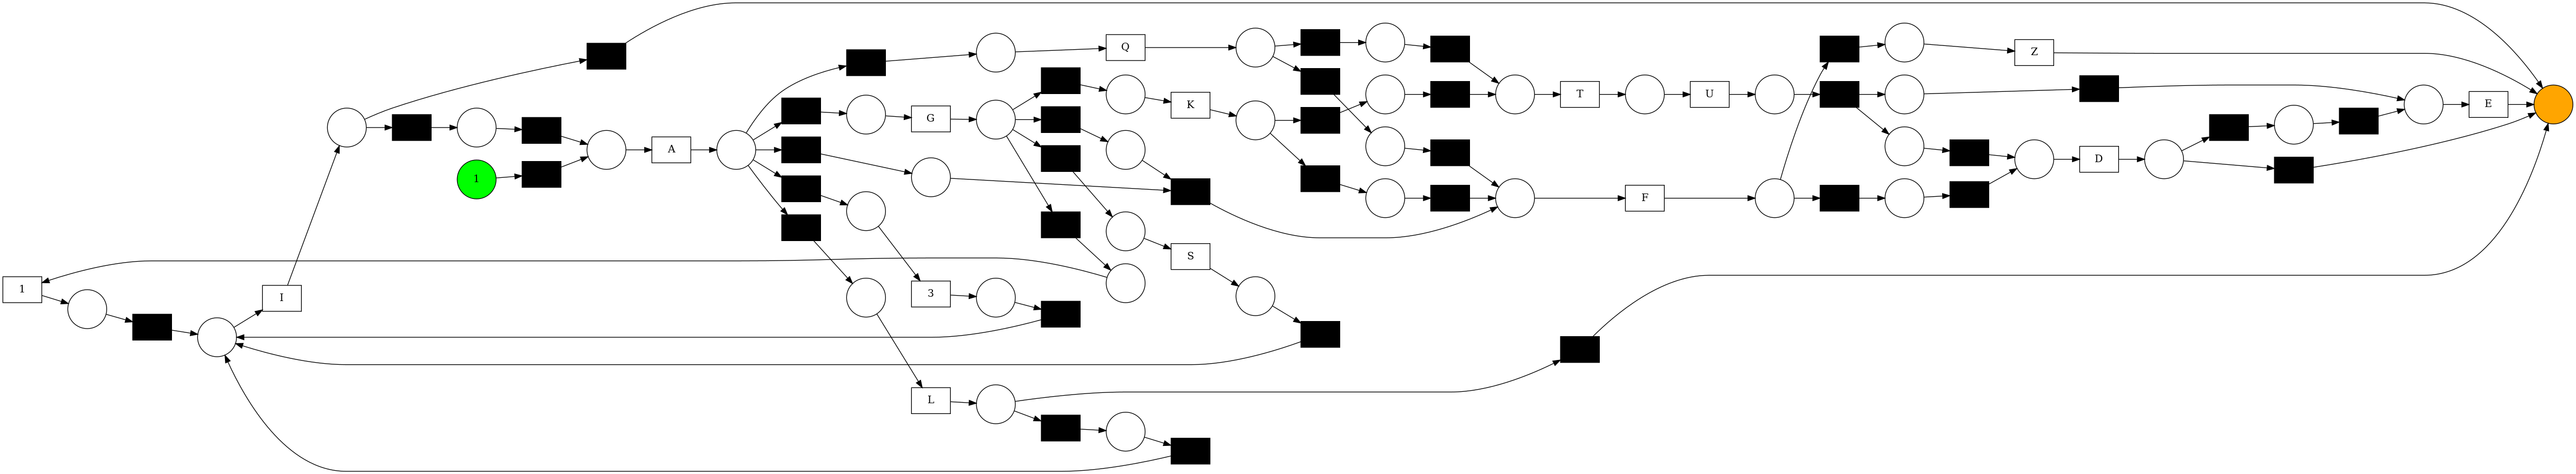

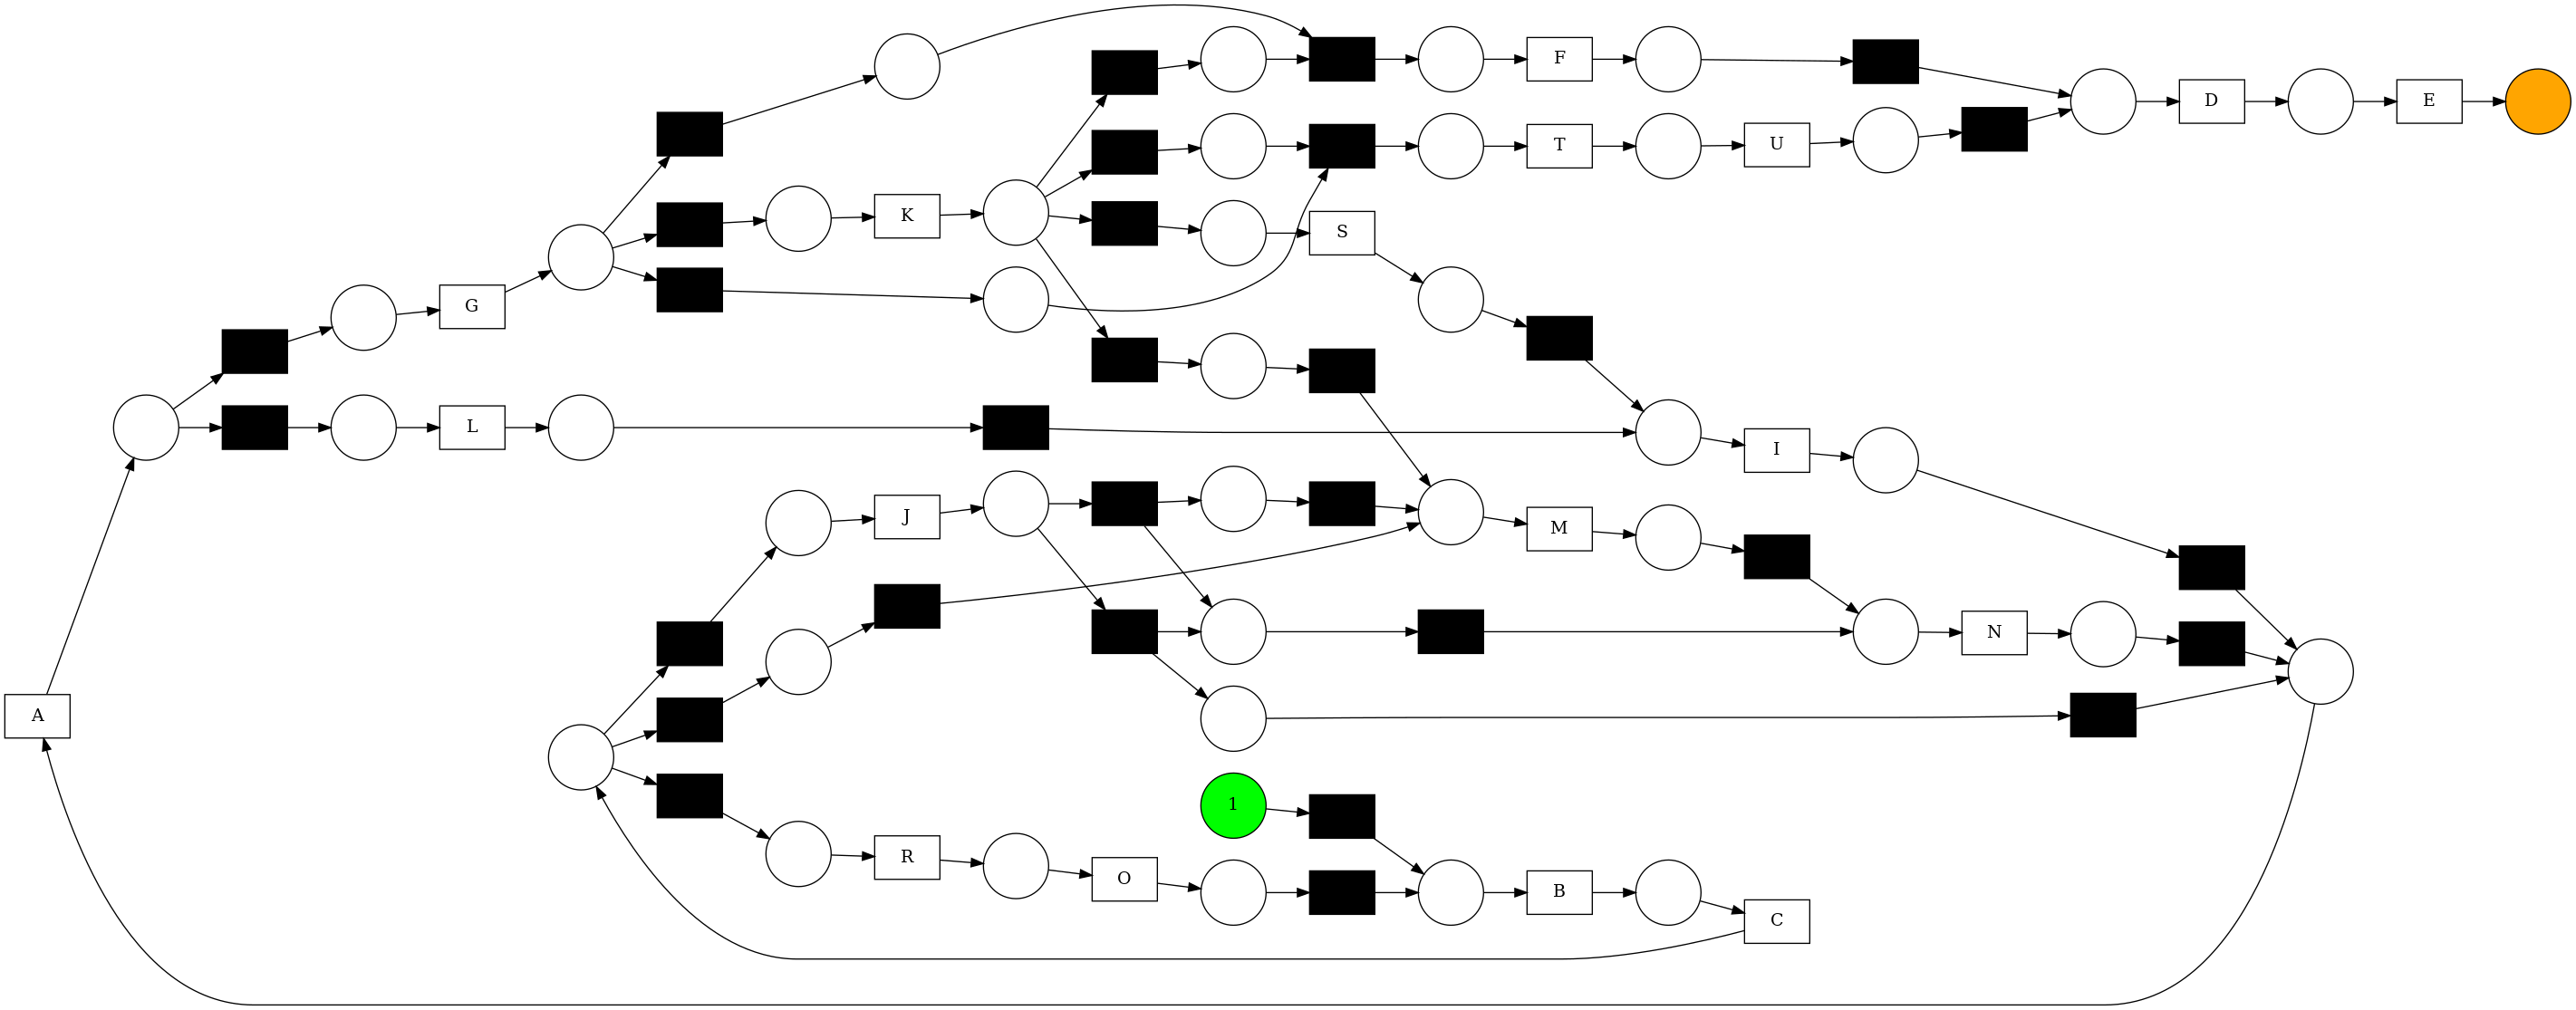

In [229]:
for i in np.unique(kmeans.labels_) : 
    c=np.array(VARIANT)[kmeans.labels_ == i]
    visualization(log, c, True, False)
    